In [85]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [86]:
train_df = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/train.csv')
test_df = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/test.csv')
submission = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/sample_submission.csv')

In [87]:
import copy

raw_train = copy.deepcopy(train_df)
raw_test = copy.deepcopy(test_df)

## 피쳐 엔지니어링

Text(0.5, 1.0, 'log tramsformation')

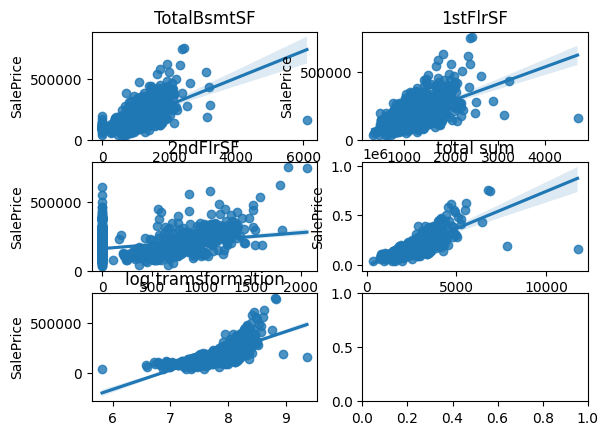

In [88]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,_)) = plt.subplots(nrows=3, ncols=2)
sns.regplot(x= train_df['TotalBsmtSF'], y=train_df['SalePrice'], ax=ax1)
ax1.set_title('TotalBsmtSF')
sns.regplot(x=train_df['1stFlrSF'], y=train_df['SalePrice'], ax=ax2)
ax2.set_title('1stFlrSF')
sns.regplot(x=train_df['2ndFlrSF'], y=train_df['SalePrice'], ax=ax3)
ax3.set_title('2ndFlrSF')
sns.regplot(x=(train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']) , y=train_df['SalePrice'], ax=ax4)
ax4.set_title('total sum')
sns.regplot(x=(np.log(train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF'])) , y=train_df['SalePrice'], ax=ax5)
ax5.set_title('log tramsformation')
# 전체 면적이 가장 큰 상관관계를 보여줌

In [89]:
# 전처리를 위해 임시로 concat
all_data = pd.concat((train_df,test_df),axis=0).reset_index(drop=True)

In [90]:
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No2ndFlr']=(all_data['2ndFlrSF']==0)
all_data['NoBsmt']=(all_data['TotalBsmtSF']==0)

all_data.drop(['1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

<Axes: ylabel='SalePrice'>

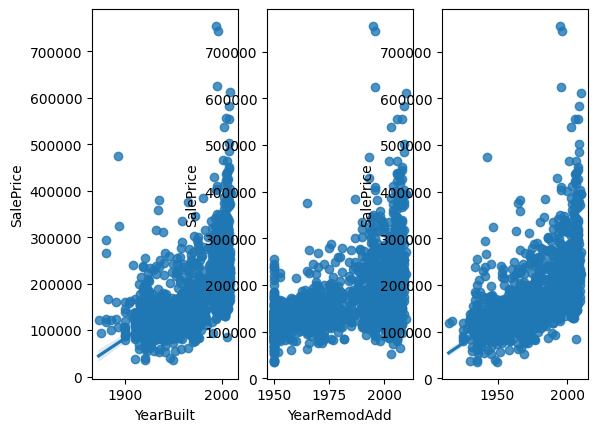

In [91]:
fig , axs = plt.subplots(nrows=1, ncols=3)
sns.regplot(x=train_df['YearBuilt'], y=train_df['SalePrice'], ax=axs[0])
sns.regplot(x=train_df['YearRemodAdd'], y=train_df['SalePrice'], ax=axs[1])
sns.regplot(x=(train_df['YearBuilt'] + train_df['YearRemodAdd'])/2, y=train_df['SalePrice'], ax=axs[2])

In [92]:
train_df['MSSubClass'].nunique()

15

<Axes: xlabel='MSSubClass', ylabel='count'>

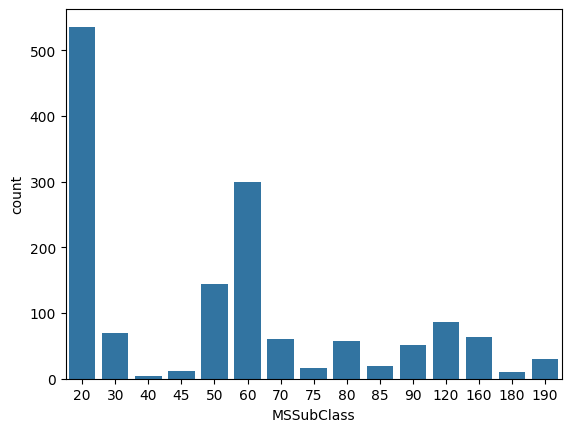

In [93]:
sns.barplot(x=train_df['MSSubClass'].value_counts().index , y=train_df['MSSubClass'].value_counts())

<Axes: xlabel='YrSold', ylabel='count'>

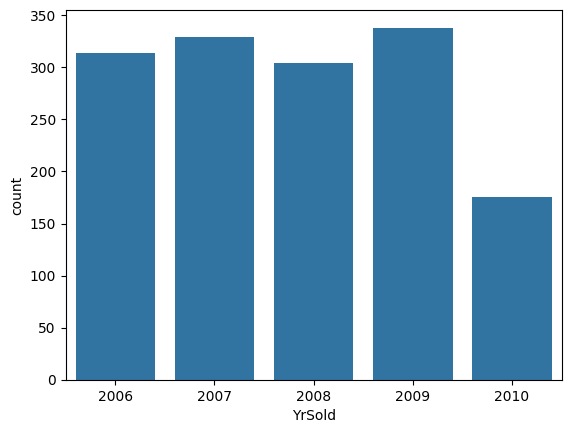

In [94]:
sns.barplot(x=train_df['YrSold'].value_counts().index , y=train_df['YrSold'].value_counts())

In [95]:
pd.DataFrame(train_df['YrSold'].value_counts())

,count
YrSold,
2009,338
2007,329
2006,314
2008,304
2010,175


In [96]:
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data.drop(['YrBltAndRemod','YearBuilt', 'YearRemodAdd'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,No2ndFlr,NoBsmt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500.0,2566.0,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500.0,2524.0,True,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500.0,2706.0,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000.0,2473.0,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000.0,3343.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2006,WD,Normal,NaN,1638.0,False,False
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2006,WD,Abnorml,NaN,1638.0,False,False
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,9,2006,WD,Abnorml,NaN,2448.0,True,False
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,Shed,700,7,2006,WD,Normal,NaN,1882.0,True,False


In [97]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)  #빌딩 넘버는 수치적인 의미라기보단 범주형 의미
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)

In [98]:
for col in train_df.columns:
    if col.startswith('Total'):
        print(col)

TotalBsmtSF


In [99]:
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt = all_data[Basement]

Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt = Bsmt.replace(to_replace='No', value=1)
Bsmt = Bsmt.replace(to_replace='Mn', value=2)
Bsmt = Bsmt.replace(to_replace='Av', value=3)
Bsmt = Bsmt.replace(to_replace='Gd', value=4)

Bsmt = Bsmt.replace(to_replace='Unf', value=1)
Bsmt = Bsmt.replace(to_replace='LwQ', value=2)
Bsmt = Bsmt.replace(to_replace='Rec', value=3)
Bsmt = Bsmt.replace(to_replace='BLQ', value=4)
Bsmt = Bsmt.replace(to_replace='ALQ', value=5)
Bsmt = Bsmt.replace(to_replace='GLQ', value=6)

In [100]:
Bsmt

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtUnfSF,TotalBsmtSF
0,3.0,1.0,706.0,0.0,6.0,1.0,4.0,150.0,856.0
1,3.0,4.0,978.0,0.0,5.0,1.0,4.0,284.0,1262.0
2,3.0,2.0,486.0,0.0,6.0,1.0,4.0,434.0,920.0
3,4.0,1.0,216.0,0.0,5.0,1.0,3.0,540.0,756.0
4,3.0,3.0,655.0,0.0,6.0,1.0,4.0,490.0,1145.0
...,...,...,...,...,...,...,...,...,...
2914,3.0,1.0,0.0,0.0,1.0,1.0,3.0,546.0,546.0
2915,3.0,1.0,252.0,0.0,3.0,1.0,3.0,294.0,546.0
2916,3.0,1.0,1224.0,0.0,5.0,1.0,3.0,0.0,1224.0
2917,3.0,3.0,337.0,0.0,6.0,1.0,4.0,575.0,912.0


In [101]:
# 점수부여, 곱

Bsmt['BsmtScore'] = Bsmt['BsmtQual'] * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore'] = Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore'] = Bsmt['BsmtFin']
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

all_data.drop(Basement, axis=1, inplace=True)

In [102]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)
all_data['LotScore']=Lot['LotScore']

all_data.drop(lot, axis=1, inplace=True)

In [103]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]
all_data['NoGarage']=(all_data['GarageArea']==0)


Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

In [104]:
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish'])*(Garage['GarageQual']) * \
(Garage['GarageType'])
all_data['GarageScore']=Garage['GarageScore']


all_data.drop(garage, axis=1, inplace=True)

In [105]:
# target log transformation
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])

In [106]:
cnt = 0
for col in train_df.columns:
    percent = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train_df[col].isnull().sum() / train_df[col].shape[0]))
    if percent[-5:] != '0.00%':  ## string.find('0.00%') == -1 
        print(percent)
        cnt +=1

print()
print(f'결측치가 포함된 칼럼의 갯수 : {cnt}')

column: LotFrontage	 Percent of NaN value: 17.74%
column:      Alley	 Percent of NaN value: 93.77%
column: MasVnrType	 Percent of NaN value: 59.73%
column: MasVnrArea	 Percent of NaN value: 0.55%
column:   BsmtQual	 Percent of NaN value: 2.53%
column:   BsmtCond	 Percent of NaN value: 2.53%
column: BsmtExposure	 Percent of NaN value: 2.60%
column: BsmtFinType1	 Percent of NaN value: 2.53%
column: BsmtFinType2	 Percent of NaN value: 2.60%
column: Electrical	 Percent of NaN value: 0.07%
column: FireplaceQu	 Percent of NaN value: 47.26%
column: GarageType	 Percent of NaN value: 5.55%
column: GarageYrBlt	 Percent of NaN value: 5.55%
column: GarageFinish	 Percent of NaN value: 5.55%
column: GarageQual	 Percent of NaN value: 5.55%
column: GarageCond	 Percent of NaN value: 5.55%
column:     PoolQC	 Percent of NaN value: 99.52%
column:      Fence	 Percent of NaN value: 80.75%
column: MiscFeature	 Percent of NaN value: 96.30%

결측치가 포함된 칼럼의 갯수 : 19


In [107]:
#Null값이 많은 column삭제
all_data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [108]:
all_data

,MSSubClass,MSZoning,Street,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,TotalSF,No2ndFlr,NoBsmt,YrBltAndRemod,BsmtScore,BsmtFinScore,BsmtDNF,LotScore,NoGarage,GarageScore
0,60,RL,Pave,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,...,2566.0,False,False,4006,10272.0,4236.0,False,13.216311,False,39456.0
1,20,RL,Pave,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,...,2524.0,True,False,3952,15144.0,4890.0,False,13.551546,False,33120.0
2,60,RL,Pave,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,...,2706.0,False,False,4003,11040.0,2916.0,False,13.547632,False,43776.0
3,70,RL,Pave,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,...,2473.0,False,False,3885,9072.0,1080.0,False,13.258643,False,11556.0
4,60,RL,Pave,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,...,3343.0,False,False,4000,13740.0,3930.0,False,13.996031,False,90288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,Pave,Lvl,AllPub,Gtl,MeadowV,Norm,Norm,Twnhs,...,1638.0,False,False,3940,4914.0,0.0,True,10.612926,True,NaN
2915,160,RM,Pave,Lvl,AllPub,Gtl,MeadowV,Norm,Norm,TwnhsE,...,1638.0,False,False,3940,4914.0,756.0,False,10.590994,False,858.0
2916,20,RL,Pave,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,...,2448.0,True,False,3956,11016.0,6120.0,False,14.978662,False,6912.0
2917,85,RL,Pave,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,...,1882.0,True,False,3984,10944.0,2022.0,False,13.380632,True,NaN


In [109]:
all_data.shape

(2919, 63)

In [110]:
#Numerical column은 평균으로 대체
print(all_data.isnull().sum().sum())
all_data.fillna(all_data.mean(numeric_only=True), inplace=True)  #Data Leakage의 방지를 위해서는 원래는 반드시 train data의 정보만을 사용해야 한다. 

4075


In [111]:
#Categorical column의 결측치 처리
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#OneHot Encoding전 shape
print('OneHot Encoding 전 트레인 데이터 shape',all_data.shape)

cat_cols = [col for col in all_data.columns if all_data[col].dtypes == 'object']
num_cols = [col for col in all_data.columns if all_data[col].dtypes != 'object']


ohe.fit(all_data[cat_cols])
encoded_columns = ohe.transform(all_data[cat_cols])
feature_names = ohe.get_feature_names_out()
encoded_columns = pd.DataFrame(encoded_columns, columns=feature_names)

all_data.drop(cat_cols, axis=1, inplace=True)                      


# all_data의 중복된 인덱스 제거
all_data = all_data[~all_data.index.duplicated()]

# encoded_columns의 중복된 인덱스 제거
encoded_columns = encoded_columns[~encoded_columns.index.duplicated()]

# 두 데이터 프레임 결합
all_data = pd.concat([all_data, encoded_columns], axis=1)

#OneHot Encoding이후 shape
print('OneHot Encoding 후 트레인 데이터 shape',all_data.shape)

OneHot Encoding 전 트레인 데이터 shape (2919, 63)
OneHot Encoding 후 트레인 데이터 shape (2919, 256)


In [112]:
all_data[['Utilities_AllPub','Utilities_NoSeWa', 'Utilities_nan']]

,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2914,1.0,0.0,0.0
2915,1.0,0.0,0.0
2916,1.0,0.0,0.0
2917,1.0,0.0,0.0


In [113]:
all_data.loc[all_data['Utilities_nan'] == 1.0, ['Utilities_AllPub','Utilities_NoSeWa']]


,Utilities_AllPub,Utilities_NoSeWa
1915,0.0,0.0
1945,0.0,0.0


In [114]:
all_data.isnull().sum().sum() ##결측치가 모두 채워짐

0

In [146]:
###### 결측 칼럼들을 모두 지워준다. ##### 완전공선성 해결
def nan_col_remover(all_data):
    for col in all_data:
        if '_nan' in col:
            print(col)
            all_data.drop(col,axis=1 ,inplace=True)


In [147]:
nan_col_remover(all_data)

MSZoning_nan
Utilities_nan
Exterior1st_nan
Exterior2nd_nan
MasVnrType_nan
Electrical_nan
KitchenQual_nan
Functional_nan
SaleType_nan


In [148]:
print(all_data.shape)

(2919, 247)


In [149]:
from scipy.stats import skew

skew_features = all_data[num_cols].apply(lambda x: skew(x))
# skewness가 1 이상인 칼럼 추출
skew_features_top = skew_features[skew_features >1]

In [150]:
skew_features

OverallQual       0.197110
OverallCond       0.570312
YearBuilt        -0.599806
YearRemodAdd     -0.451020
MasVnrArea        2.611549
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtFullBath      0.623955
BsmtHalfBath      3.931343
FullBath          0.167606
HalfBath          0.694566
BedroomAbvGr      0.326324
KitchenAbvGr      4.302254
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
SalePrice         0.171404
TotalSF           1.515609
No2ndFlr         -0.288675
NoBsmt            5.869458
YrBltAndRemod    -0.304307
BsmtScore         2.158259
BsmtFinScore      1.712181
BsmtDNF           0.917383
LotScore         -1.254539
NoGarage          3.955907
GarageScore       1.777560
dtype: float64

In [151]:
skew_features_top

MasVnrArea        2.611549
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtHalfBath      3.931343
KitchenAbvGr      4.302254
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
TotalSF           1.515609
NoBsmt            5.869458
BsmtScore         2.158259
BsmtFinScore      1.712181
NoGarage          3.955907
GarageScore       1.777560
dtype: float64

In [152]:
# skew feature의 log transformation
all_data[skew_features_top.index] = np.log1p(all_data[skew_features_top.index])

In [153]:
print(train_df.shape, test_df.shape)
train_df=all_data[:len(train_df)]
test_df=all_data[len(train_df):]
print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)
(1460, 247) (1459, 247)


In [154]:
train_df.columns.values

array(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'SalePrice', 'TotalSF', 'No2ndFlr',
       'NoBsmt', 'YrBltAndRemod', 'BsmtScore', 'BsmtFinScore', 'BsmtDNF',
       'LotScore', 'NoGarage', 'GarageScore', 'MSSubClass_120',
       'MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContou

## 선형 회귀 모델

In [155]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE(RMSLE):', np.round(rmse,3))
    return rmse
    
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [156]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)



#model define
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 44498.231
Ridge 로그 변환된 RMSE(RMSLE): 0.127
Lasso 로그 변환된 RMSE(RMSLE): 0.328


[44498.23146957037, 0.12721767553766009, 0.32803277814531506]

In [157]:
def get_coef(model, n=10):
    coef = pd.Series(model.coef_, index = X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    
    return coef_high,coef_low

def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i, model in enumerate(models):
        coef_high, coef_low = get_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        
        axs[i].set_title(model.__class__.__name__+'Coefficients', size=25)
        axs[i].tick_params(axis='y', direction='in', pad=-120)
        
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i])

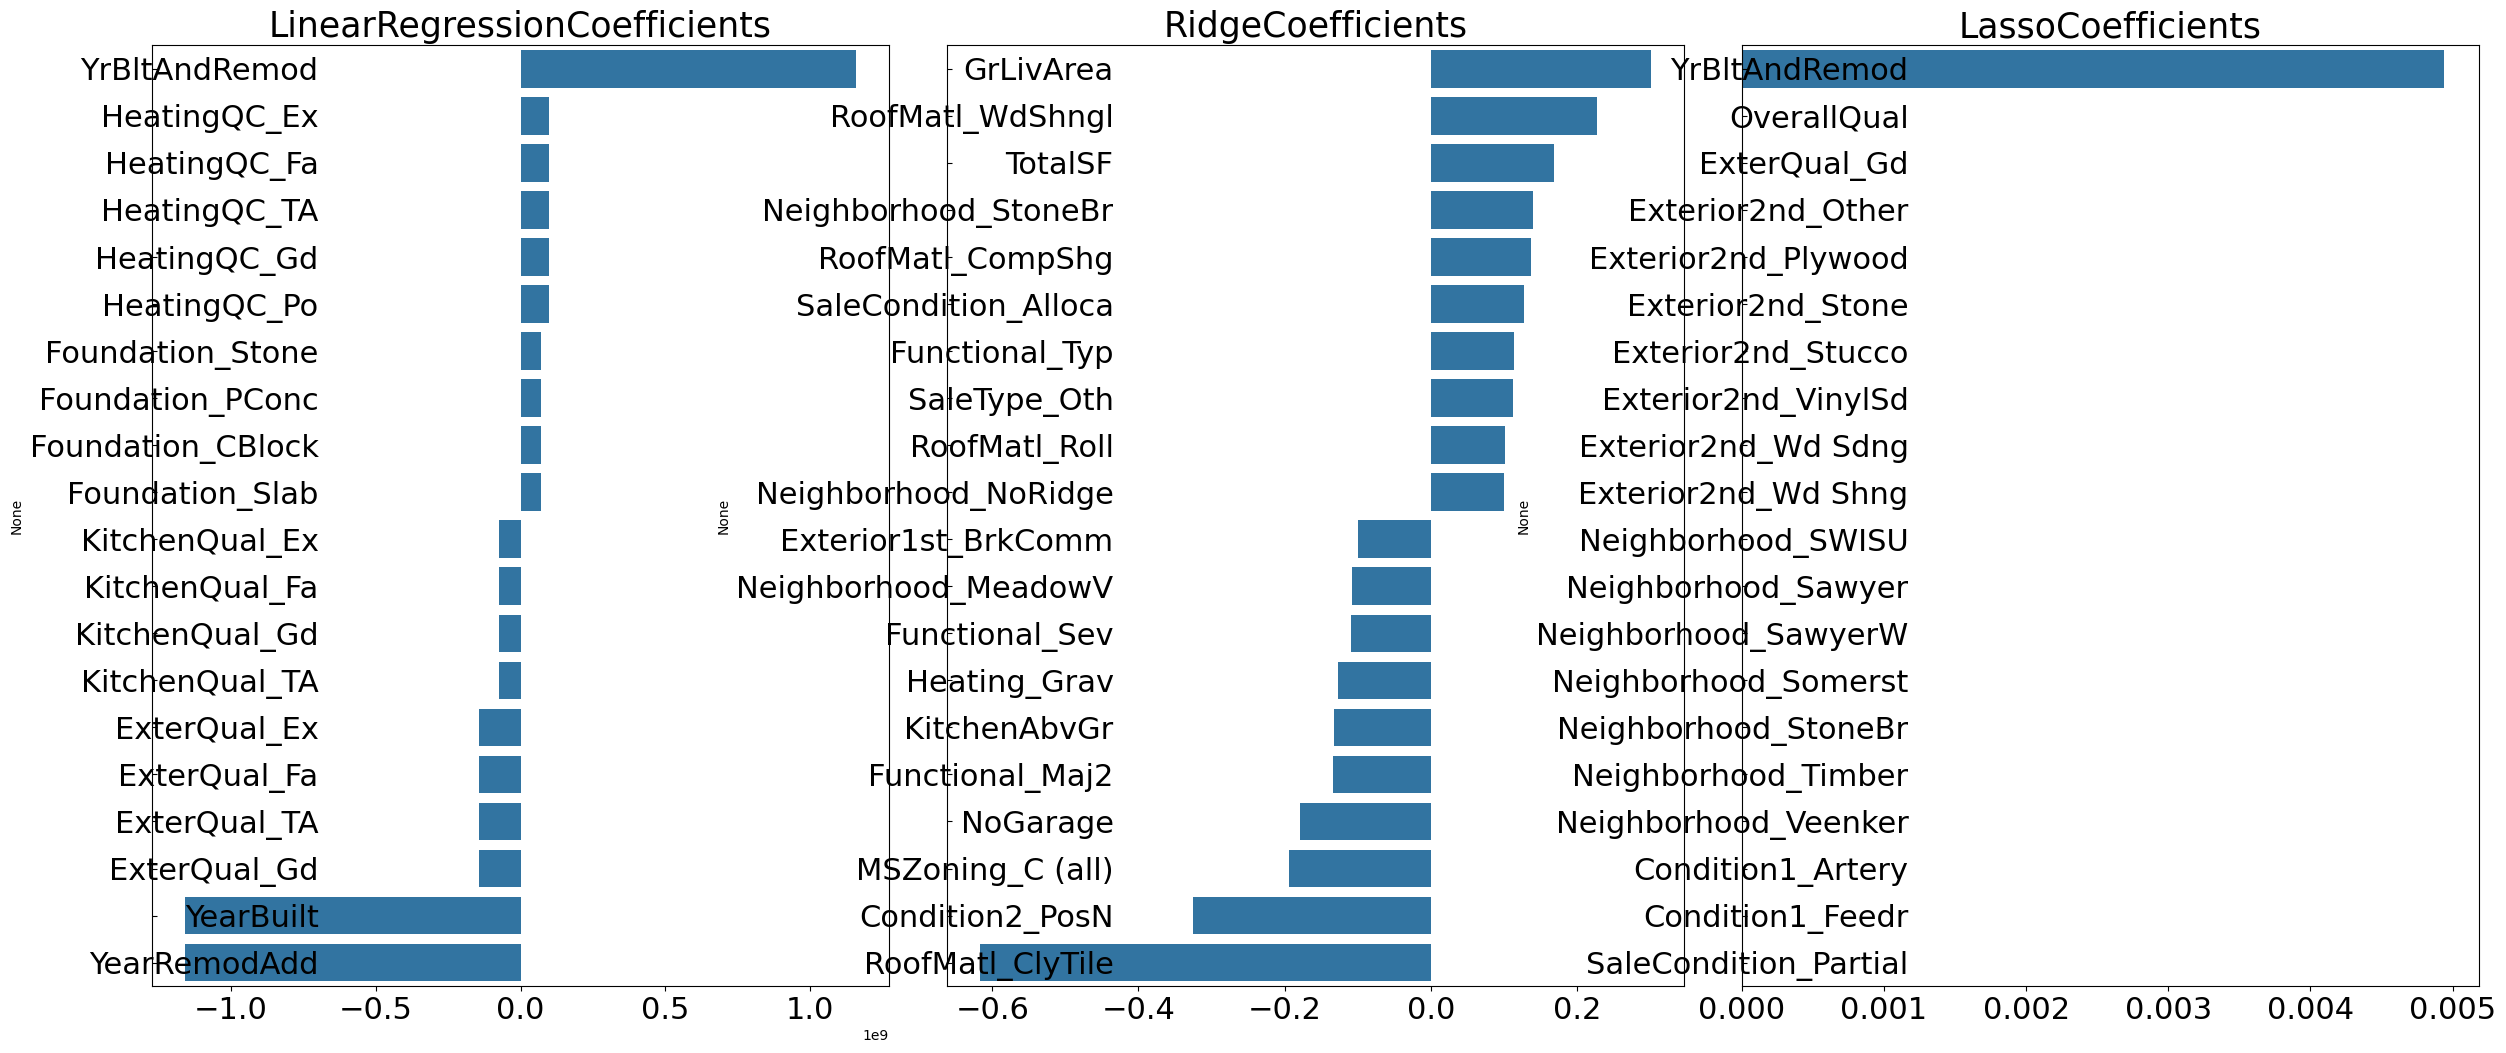

In [158]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

In [159]:
from sklearn.model_selection import GridSearchCV


def print_best_params(model,params):
    grid_model = GridSearchCV(model,param_grid=params,
                              scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값 : {1}, 최적 alpha :{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))
    

In [160]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

In [161]:
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.13, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.128, 최적 alpha :{'alpha': 0.001}


In [162]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 44498.231
Ridge 로그 변환된 RMSE(RMSLE): 0.131
Lasso 로그 변환된 RMSE(RMSLE): 0.132


[44498.23146957037, 0.13067456105375486, 0.13228646099123934]

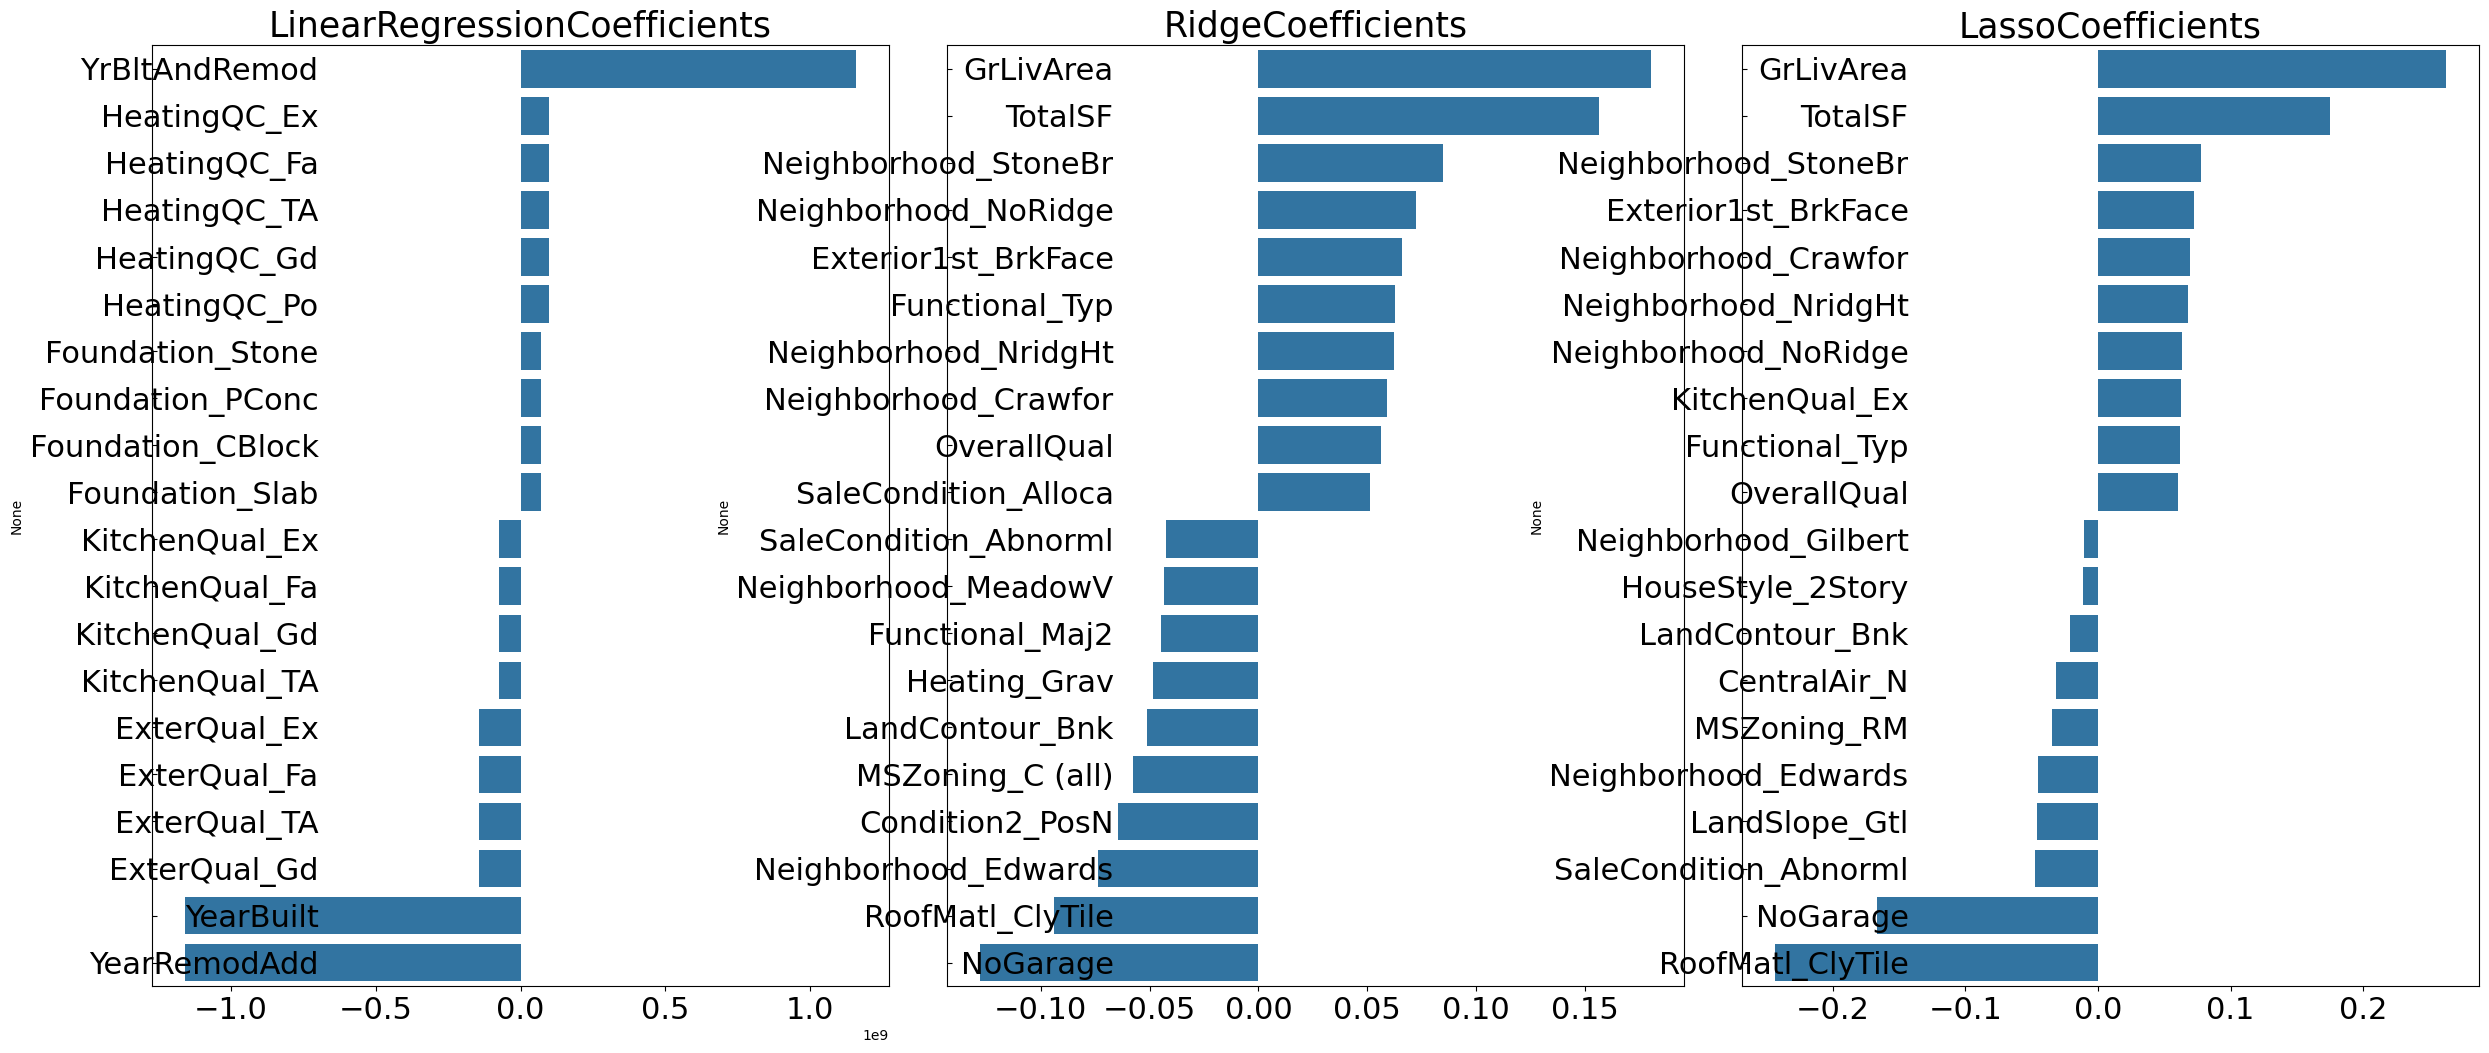

In [163]:
visualize_coef(models)

In [164]:
y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)

In [165]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.13, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.128, 최적 alpha :{'alpha': 0.001}


In [166]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 44498.231
Ridge 로그 변환된 RMSE(RMSLE): 0.13
Lasso 로그 변환된 RMSE(RMSLE): 0.132


[44498.23146957037, 0.13039473402769006, 0.13228646099123934]

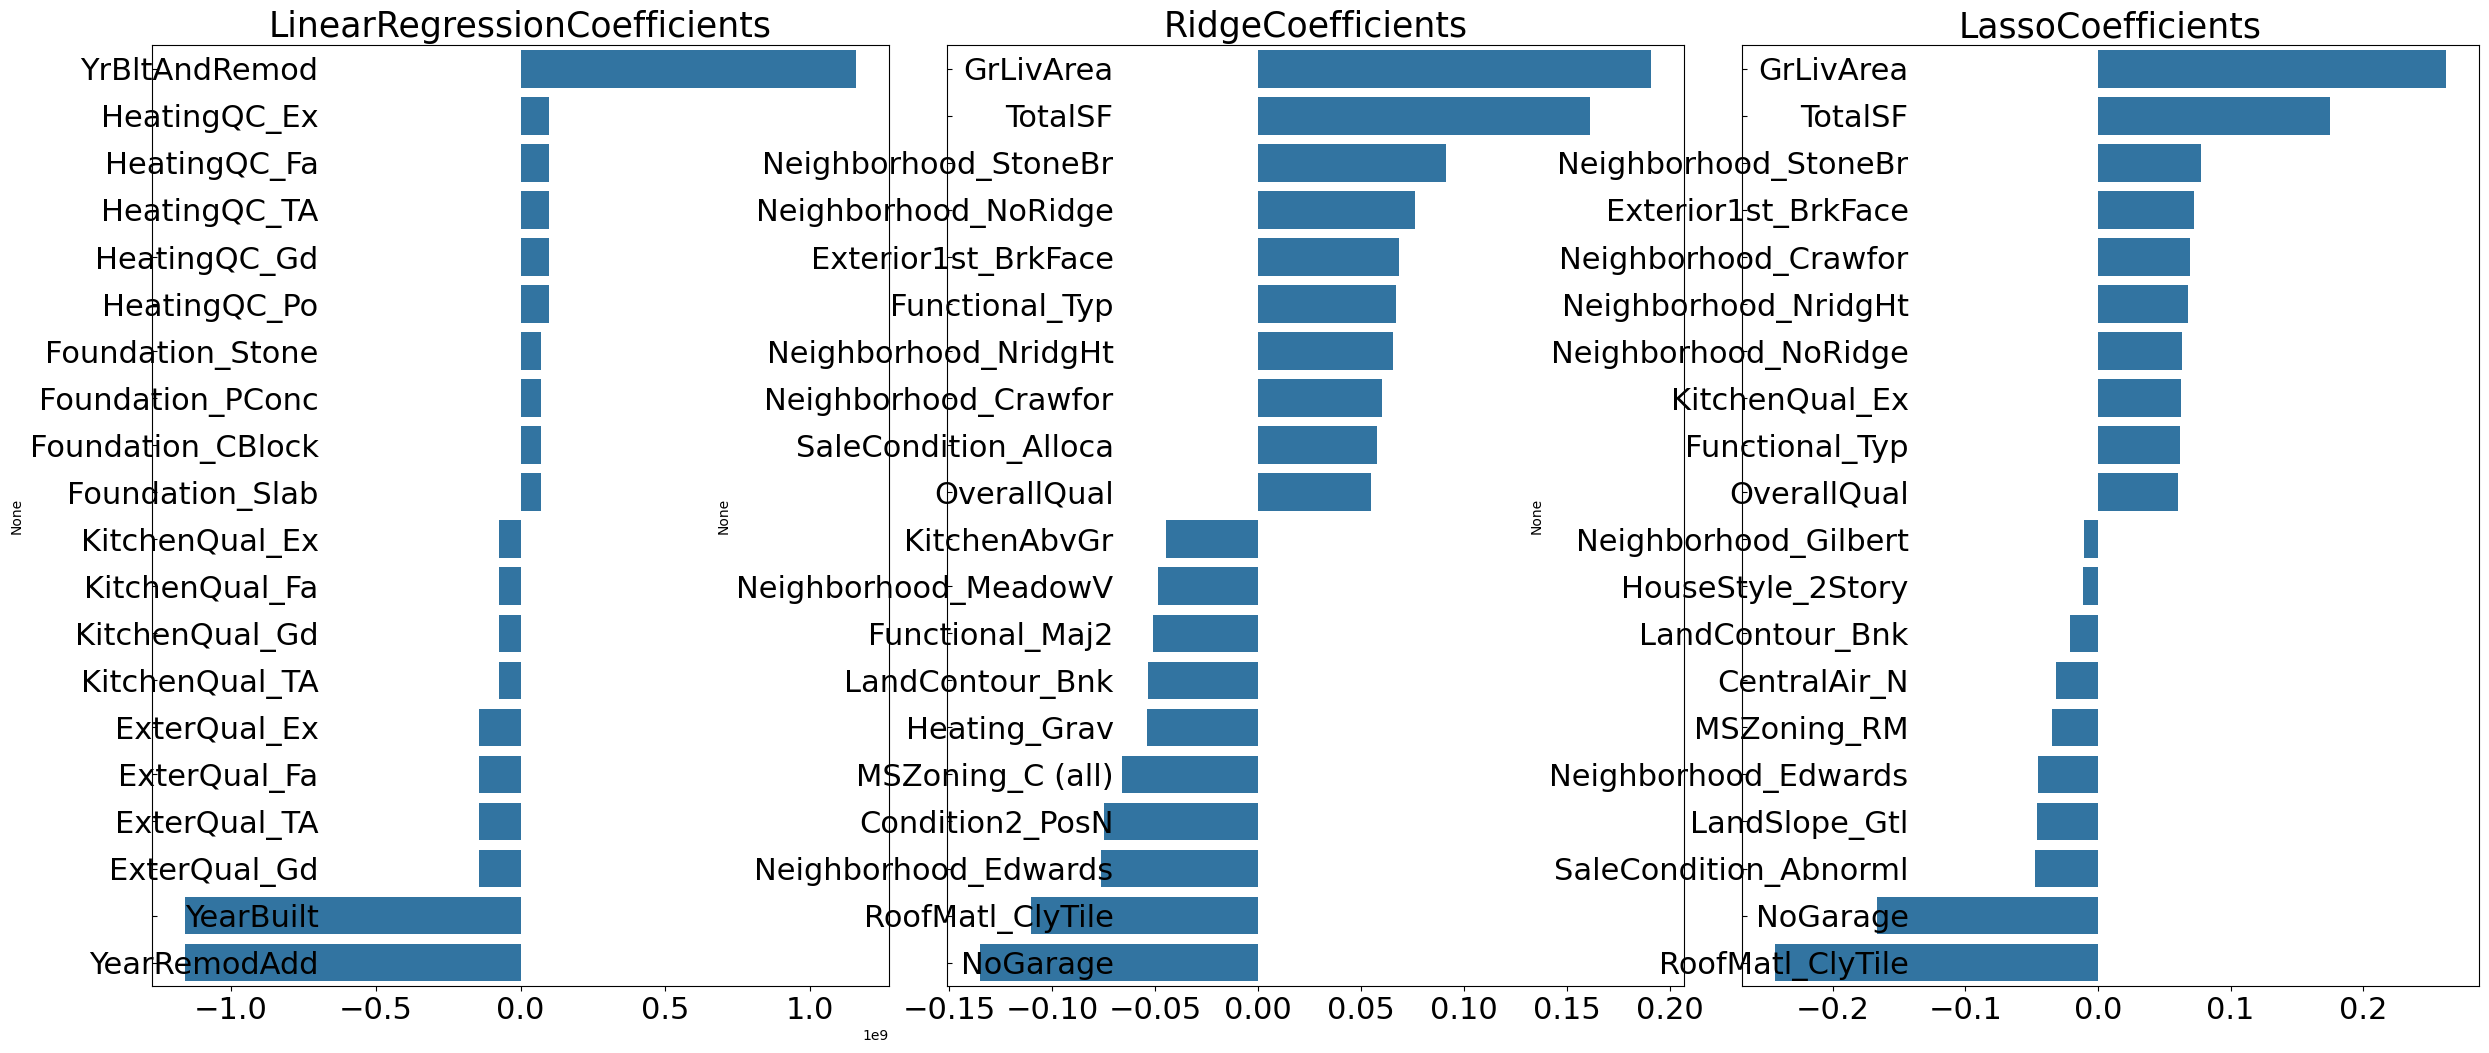

In [167]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

단변량 분석

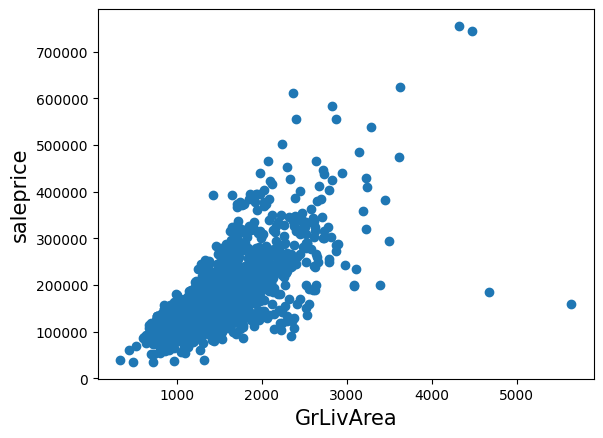

In [168]:
plt.scatter(x= raw_train['GrLivArea'], y=raw_train['SalePrice']) #원본 데이터
plt.ylabel('saleprice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

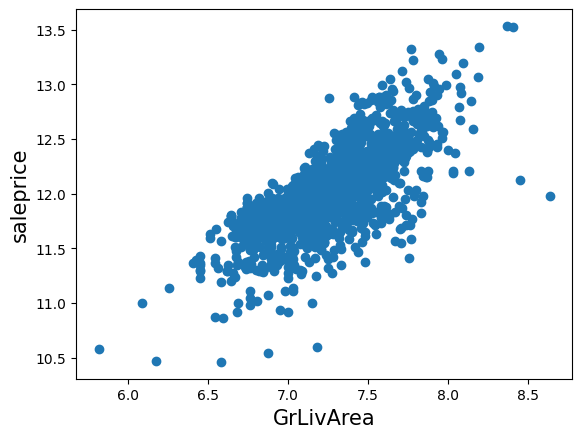

In [169]:
plt.scatter(x= train_df['GrLivArea'], y=train_df['SalePrice']) #원본 데이터
plt.ylabel('saleprice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [170]:
cond1 = raw_train['GrLivArea']> 4000
cond2 = raw_train['SalePrice']< 500000
outlier_index = raw_train[cond1&cond2].index
outlier_index

Index([523, 1298], dtype='int64')

In [171]:
train_df.drop(outlier_index, axis=0, inplace=True)

## 이상치 제거

In [172]:
# 이상치 제거후 피쳐 다시 생성
y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)

In [173]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.117, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.1167, 최적 alpha :{'alpha': 0.001}


In [174]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 224164.713
Ridge 로그 변환된 RMSE(RMSLE): 0.119
Lasso 로그 변환된 RMSE(RMSLE): 0.119


[224164.71348351933, 0.11871593677099612, 0.11907358100068179]

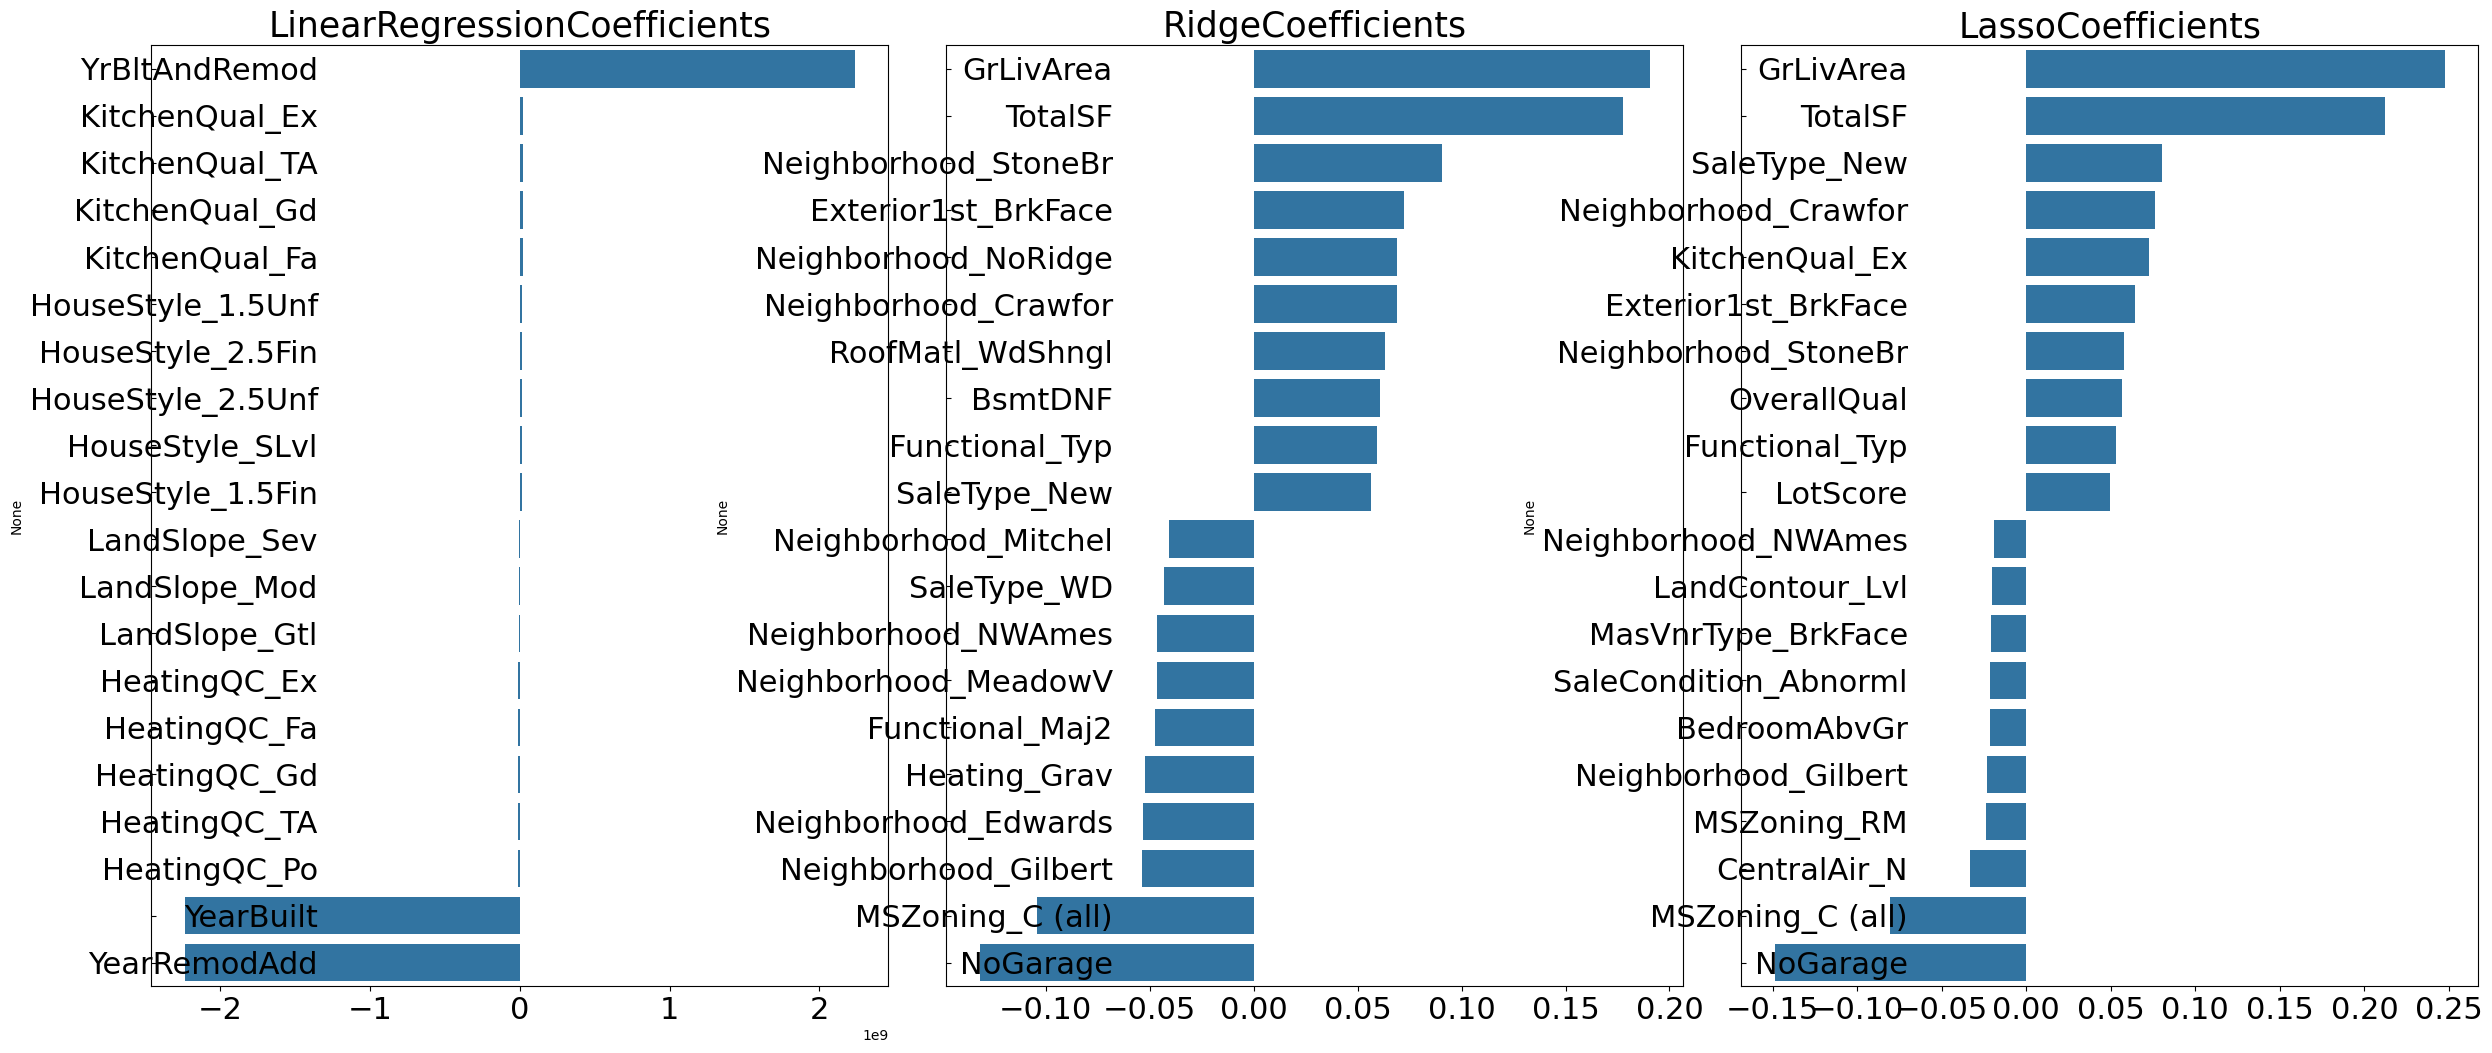

In [175]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

# 트리기반 모델

In [176]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV시 최적 평균 RMSE 값 : 0.1191, 최적 alpha :{'n_estimators': 1000}


In [177]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=1)

print_best_params(lgbm_reg,lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2605
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 156
[LightGBM] [Info] Start training from score 12.021352
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2616
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 153
[LightGBM] [Info] Start training from score 12.023516
[LightGBM] [Warning] Found

# 앙상블

### 회귀모델 앙상블

In [178]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE : {1}'.format(key,rmse))

In [179]:
# 개별 모델 피팅
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출 
pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.11760061537908915
Ridge 모델의 RMSE : 0.11871593677099612
Lasso 모델의 RMSE : 0.11907358100068179


In [180]:
pred = 0.3*ridge_pred + 0.7*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.1178037926356116
Ridge 모델의 RMSE : 0.11871593677099612
Lasso 모델의 RMSE : 0.11907358100068179


In [181]:
pred = 0.2*ridge_pred + 0.8*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.1181176475344096
Ridge 모델의 RMSE : 0.11871593677099612
Lasso 모델의 RMSE : 0.11907358100068179


### 트리 모델 앙상블

In [182]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambmda=10, n_jobs=1)


xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Unknown parameter: reg_lambmda
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: reg_lambmda
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2605
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 154
[LightGBM] [Info] Start training from score 12.023362
[LightGBM] [Warning] Unknown parameter: reg_lambmda
최종혼합 모델의 RMSE : 0.12083348368118763
XGBM 모델의 RMSE : 0.12448765379804715
LGBM 모델의 RMSE : 0.12099596034659964


In [183]:
pred = 0.6*xgb_pred + 0.4*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.12126484930253469
XGBM 모델의 RMSE : 0.12448765379804715
LGBM 모델의 RMSE : 0.12099596034659964


## Optuna를 활용한 하이퍼파라미터 튜닝후 재 앙상블

In [184]:
import optuna

In [185]:
def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=False)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [186]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-03-15 19:31:33,194] A new study created in memory with name: no-name-cda70c13-0c40-4e75-922f-9d380ce54d8e
[I 2024-03-15 19:31:37,162] Trial 0 finished with value: 0.12045545178995247 and parameters: {'learning_rate': 0.032404135616770066, 'max_depth': 4, 'subsample': 0.6742782679307567, 'colsample_bytree': 0.6094266507080445, 'min_child_weight': 5}. Best is trial 0 with value: 0.12045545178995247.
[I 2024-03-15 19:31:38,929] Trial 1 finished with value: 0.6560024121850822 and parameters: {'learning_rate': 0.0029162466450590057, 'max_depth': 3, 'subsample': 0.3283260917366961, 'colsample_bytree': 0.27532329691064006, 'min_child_weight': 9}. Best is trial 0 with value: 0.12045545178995247.
[I 2024-03-15 19:31:42,127] Trial 2 finished with value: 0.12655445456385303 and parameters: {'learning_rate': 0.030702888284474705, 'max_depth': 10, 'subsample': 0.06458006270064143, 'colsample_bytree': 0.4762015125708595, 'min_child_weight': 4}. Best is trial 0 with value: 0.12045545178995247

In [187]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.04217351449827084, 'max_depth': 3, 'subsample': 0.7066507952915954, 'colsample_bytree': 0.43264517933740776, 'min_child_weight': 2}
Best RMSE: 0.11228243792580173


In [188]:
best_params = study.best_params
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-rmse:11.04870
[1]	validation_0-rmse:10.58393
[2]	validation_0-rmse:10.13908
[3]	validation_0-rmse:9.71322
[4]	validation_0-rmse:9.30438
[5]	validation_0-rmse:8.91304
[6]	validation_0-rmse:8.53848
[7]	validation_0-rmse:8.17972
[8]	validation_0-rmse:7.83600
[9]	validation_0-rmse:7.50798
[10]	validation_0-rmse:7.19265
[11]	validation_0-rmse:6.88979
[12]	validation_0-rmse:6.60064
[13]	validation_0-rmse:6.32319
[14]	validation_0-rmse:6.05722
[15]	validation_0-rmse:5.80180
[16]	validation_0-rmse:5.55805
[17]	validation_0-rmse:5.32544
[18]	validation_0-rmse:5.10220
[19]	validation_0-rmse:4.88795
[20]	validation_0-rmse:4.68242
[21]	validation_0-rmse:4.48656
[22]	validation_0-rmse:4.29879
[23]	validation_0-rmse:4.11769
[24]	validation_0-rmse:3.94509
[25]	validation_0-rmse:3.77864
[26]	validation_0-rmse:3.61929
[27]	validation_0-rmse:3.46769
[28]	validation_0-rmse:3.32170
[29]	validation_0-rmse:3.18229
[30]	validation_0-rmse:3.04935
[31]	validation_0-rmse:2.92165
[32]	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.43264517933740776, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04217351449827084,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [189]:
import lightgbm as lgb

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test)

    params = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
    }

    model = lgb.train(params, dtrain, valid_sets=[dvalid],  num_boost_round=1000, 
                      callbacks=[lgb.early_stopping(stopping_rounds=50)])
    predictions = model.predict(X_test, num_iteration=model.best_iteration)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse


In [190]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2024-03-15 19:36:46,220] A new study created in memory with name: no-name-f977b1f3-9e8f-4bc4-a2df-b7c441dc42cd


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:46,433] Trial 0 finished with value: 0.2362793011594531 and parameters: {'learning_rate': 0.0013491641397794392, 'max_depth': 2, 'num_leaves': 93, 'subsample': 0.209643497988513, 'colsample_bytree': 0.21630240437154274, 'min_child_weight': 10, 'reg_alpha': 0.0015937890361944125, 'reg_lambda': 7.561229125006356}. Best is trial 0 with value: 0.2362793011594531.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.236279
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.270382


[I 2024-03-15 19:36:46,626] Trial 1 finished with value: 0.27038219208439385 and parameters: {'learning_rate': 0.0013497884770557798, 'max_depth': 1, 'num_leaves': 210, 'subsample': 0.7789905633438365, 'colsample_bytree': 0.3982796181408467, 'min_child_weight': 17, 'reg_alpha': 0.7835449990020225, 'reg_lambda': 0.7419792009165402}. Best is trial 0 with value: 0.2362793011594531.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:47,173] Trial 2 finished with value: 0.16791507149928164 and parameters: {'learning_rate': 0.001963913162231753, 'max_depth': 5, 'num_leaves': 49, 'subsample': 0.93420445314917, 'colsample_bytree': 0.8507894212950902, 'min_child_weight': 10, 'reg_alpha': 0.33834069555656976, 'reg_lambda': 2.463652894643865}. Best is trial 2 with value: 0.16791507149928164.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.167915
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:47,362] Trial 3 finished with value: 0.12760220411084278 and parameters: {'learning_rate': 0.06424961205202863, 'max_depth': 7, 'num_leaves': 253, 'subsample': 0.5520164643731391, 'colsample_bytree': 0.8630164556203033, 'min_child_weight': 14, 'reg_alpha': 0.013363437935030883, 'reg_lambda': 0.1281873839073786}. Best is trial 3 with value: 0.12760220411084278.


Early stopping, best iteration is:
[229]	valid_0's rmse: 0.127602
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:47,612] Trial 4 finished with value: 0.12803404380327568 and parameters: {'learning_rate': 0.032066670662612824, 'max_depth': 5, 'num_leaves': 11, 'subsample': 0.21235835338883025, 'colsample_bytree': 0.8774055066855655, 'min_child_weight': 1, 'reg_alpha': 0.9200922284632276, 'reg_lambda': 1.4212068109351048}. Best is trial 3 with value: 0.12760220411084278.


Early stopping, best iteration is:
[602]	valid_0's rmse: 0.128034
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:47,862] Trial 5 finished with value: 0.23759672398616274 and parameters: {'learning_rate': 0.001215096507608166, 'max_depth': 3, 'num_leaves': 100, 'subsample': 0.5879902155198414, 'colsample_bytree': 0.7483973089512622, 'min_child_weight': 18, 'reg_alpha': 8.084347532296821, 'reg_lambda': 0.10809191872596113}. Best is trial 3 with value: 0.12760220411084278.
[I 2024-03-15 19:36:48,033] Trial 6 finished with value: 0.1783757083373389 and parameters: {'learning_rate': 0.0051381755268883516, 'max_depth': 1, 'num_leaves': 21, 'subsample': 0.7783393331686236, 'colsample_bytree': 0.3985687700923866, 'min_child_weight': 14, 'reg_alpha': 0.15590650799918482, 'reg_lambda': 0.11593345357944539}. Best is trial 3 with value: 0.12760220411084278.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.237597
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.178376
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:48,457] Trial 7 finished with value: 0.12727466786624123 and parameters: {'learning_rate': 0.007050072541263483, 'max_depth': 5, 'num_leaves': 192, 'subsample': 0.6461473647506008, 'colsample_bytree': 0.1941724212514065, 'min_child_weight': 15, 'reg_alpha': 0.01576866667706189, 'reg_lambda': 0.005239000198315413}. Best is trial 7 with value: 0.12727466786624123.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.127275
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:48,745] Trial 8 finished with value: 0.13195373861768006 and parameters: {'learning_rate': 0.03727629446453948, 'max_depth': 7, 'num_leaves': 158, 'subsample': 0.7011160571395453, 'colsample_bytree': 0.6797071344685164, 'min_child_weight': 13, 'reg_alpha': 1.9079923021374725, 'reg_lambda': 0.038270152259982926}. Best is trial 7 with value: 0.12727466786624123.


Early stopping, best iteration is:
[393]	valid_0's rmse: 0.131954
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:49,196] Trial 9 finished with value: 0.2196611247556133 and parameters: {'learning_rate': 0.001466210719599549, 'max_depth': 5, 'num_leaves': 82, 'subsample': 0.441622519729538, 'colsample_bytree': 0.4520033602393642, 'min_child_weight': 12, 'reg_alpha': 7.028424945020145, 'reg_lambda': 0.3707517424480935}. Best is trial 7 with value: 0.12727466786624123.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.219661
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:49,788] Trial 10 finished with value: 0.13376728981342573 and parameters: {'learning_rate': 0.009139795629823038, 'max_depth': 10, 'num_leaves': 157, 'subsample': 0.9763902246501992, 'colsample_bytree': 0.0689034370111806, 'min_child_weight': 5, 'reg_alpha': 0.02074191714933399, 'reg_lambda': 0.0036224249722869163}. Best is trial 7 with value: 0.12727466786624123.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.133767
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:50,003] Trial 11 finished with value: 0.12491204387776422 and parameters: {'learning_rate': 0.06795246435348393, 'max_depth': 8, 'num_leaves': 246, 'subsample': 0.4550508206746571, 'colsample_bytree': 0.5926079020419657, 'min_child_weight': 16, 'reg_alpha': 0.013073680122292363, 'reg_lambda': 0.001081860750079967}. Best is trial 11 with value: 0.12491204387776422.


Early stopping, best iteration is:
[231]	valid_0's rmse: 0.124912
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:50,649] Trial 12 finished with value: 0.12205623993804346 and parameters: {'learning_rate': 0.01591607106688339, 'max_depth': 9, 'num_leaves': 220, 'subsample': 0.3995473250410344, 'colsample_bytree': 0.5697174971956788, 'min_child_weight': 20, 'reg_alpha': 0.012887471789256944, 'reg_lambda': 0.0012144502921390087}. Best is trial 12 with value: 0.12205623993804346.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.122056
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:51,514] Trial 13 finished with value: 0.12339840498366232 and parameters: {'learning_rate': 0.01813967713909023, 'max_depth': 10, 'num_leaves': 256, 'subsample': 0.39863701387172795, 'colsample_bytree': 0.5969155045618617, 'min_child_weight': 20, 'reg_alpha': 0.002626375246379508, 'reg_lambda': 0.001312012603875642}. Best is trial 12 with value: 0.12205623993804346.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.123398
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:52,240] Trial 14 finished with value: 0.12256644371327842 and parameters: {'learning_rate': 0.01550896798880675, 'max_depth': 10, 'num_leaves': 214, 'subsample': 0.32728830906508777, 'colsample_bytree': 0.5578018584236603, 'min_child_weight': 20, 'reg_alpha': 0.001335975835157897, 'reg_lambda': 0.01366354077680467}. Best is trial 12 with value: 0.12205623993804346.


Early stopping, best iteration is:
[812]	valid_0's rmse: 0.122566
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:52,836] Trial 15 finished with value: 0.12141246768130465 and parameters: {'learning_rate': 0.016325394330565596, 'max_depth': 9, 'num_leaves': 211, 'subsample': 0.0539966798530388, 'colsample_bytree': 0.5083767704738104, 'min_child_weight': 20, 'reg_alpha': 0.004176166390290131, 'reg_lambda': 0.020682974296952192}. Best is trial 15 with value: 0.12141246768130465.


Early stopping, best iteration is:
[524]	valid_0's rmse: 0.121412
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:53,680] Trial 16 finished with value: 0.1264906510807113 and parameters: {'learning_rate': 0.004950092985555126, 'max_depth': 8, 'num_leaves': 175, 'subsample': 0.08859851506419775, 'colsample_bytree': 0.33279634323748764, 'min_child_weight': 6, 'reg_alpha': 0.062364657084523656, 'reg_lambda': 0.014939208234412662}. Best is trial 15 with value: 0.12141246768130465.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.126491
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:54,343] Trial 17 finished with value: 0.12496715875477009 and parameters: {'learning_rate': 0.018878285024705087, 'max_depth': 9, 'num_leaves': 129, 'subsample': 0.09735540504068385, 'colsample_bytree': 0.7236844259133105, 'min_child_weight': 18, 'reg_alpha': 0.003488191588902378, 'reg_lambda': 0.004002449433792954}. Best is trial 15 with value: 0.12141246768130465.


Early stopping, best iteration is:
[764]	valid_0's rmse: 0.124967
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:55,278] Trial 18 finished with value: 0.1359326459490665 and parameters: {'learning_rate': 0.0030204714710115196, 'max_depth': 7, 'num_leaves': 219, 'subsample': 0.1970753383340562, 'colsample_bytree': 0.5106622162554447, 'min_child_weight': 19, 'reg_alpha': 0.005494756808377477, 'reg_lambda': 0.028787420017915698}. Best is trial 15 with value: 0.12141246768130465.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.135933
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:55,717] Trial 19 finished with value: 0.12970378349642703 and parameters: {'learning_rate': 0.03125661466217474, 'max_depth': 9, 'num_leaves': 128, 'subsample': 0.05151107328458061, 'colsample_bytree': 0.966570847072437, 'min_child_weight': 8, 'reg_alpha': 0.0481570719258902, 'reg_lambda': 0.009592538370294336}. Best is trial 15 with value: 0.12141246768130465.


Early stopping, best iteration is:
[368]	valid_0's rmse: 0.129704
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:56,765] Trial 20 finished with value: 0.12216055879736017 and parameters: {'learning_rate': 0.012265448373474225, 'max_depth': 8, 'num_leaves': 231, 'subsample': 0.32321556069709934, 'colsample_bytree': 0.32574440415697076, 'min_child_weight': 16, 'reg_alpha': 0.006883998684395847, 'reg_lambda': 0.04686205083509157}. Best is trial 15 with value: 0.12141246768130465.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.122161
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:57,458] Trial 21 finished with value: 0.12124089543838613 and parameters: {'learning_rate': 0.012830043307568111, 'max_depth': 8, 'num_leaves': 227, 'subsample': 0.3113189417210326, 'colsample_bytree': 0.2925610906648556, 'min_child_weight': 20, 'reg_alpha': 0.006620081449670163, 'reg_lambda': 0.04149916925569559}. Best is trial 21 with value: 0.12124089543838613.


Did not meet early stopping. Best iteration is:
[985]	valid_0's rmse: 0.121241
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:58,168] Trial 22 finished with value: 0.12132784715503968 and parameters: {'learning_rate': 0.02074354226653366, 'max_depth': 9, 'num_leaves': 184, 'subsample': 0.28242173841647883, 'colsample_bytree': 0.2310743871542713, 'min_child_weight': 20, 'reg_alpha': 0.03303839076950979, 'reg_lambda': 0.002250697157812978}. Best is trial 21 with value: 0.12124089543838613.


Early stopping, best iteration is:
[813]	valid_0's rmse: 0.121328
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:58,656] Trial 23 finished with value: 0.12297374837334588 and parameters: {'learning_rate': 0.024959814515493003, 'max_depth': 6, 'num_leaves': 173, 'subsample': 0.2766751094761876, 'colsample_bytree': 0.19955162354384837, 'min_child_weight': 18, 'reg_alpha': 0.03428977974289172, 'reg_lambda': 0.3299295106544637}. Best is trial 21 with value: 0.12124089543838613.


Early stopping, best iteration is:
[929]	valid_0's rmse: 0.122974
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:58,970] Trial 24 finished with value: 0.12684406870887713 and parameters: {'learning_rate': 0.047227138505466504, 'max_depth': 9, 'num_leaves': 186, 'subsample': 0.15259885564073045, 'colsample_bytree': 0.10052538424312105, 'min_child_weight': 20, 'reg_alpha': 0.12643597272688623, 'reg_lambda': 0.023760587497549578}. Best is trial 21 with value: 0.12124089543838613.


Early stopping, best iteration is:
[490]	valid_0's rmse: 0.126844
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:36:59,642] Trial 25 finished with value: 0.12257116974755784 and parameters: {'learning_rate': 0.009633716175146408, 'max_depth': 8, 'num_leaves': 198, 'subsample': 0.3055213544091897, 'colsample_bytree': 0.26651957914471874, 'min_child_weight': 17, 'reg_alpha': 0.006267868586198775, 'reg_lambda': 0.06067539128846678}. Best is trial 21 with value: 0.12124089543838613.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.122571
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:00,095] Trial 26 finished with value: 0.12351096149336181 and parameters: {'learning_rate': 0.022257492544750658, 'max_depth': 6, 'num_leaves': 153, 'subsample': 0.15497739287409773, 'colsample_bytree': 0.15905001984840916, 'min_child_weight': 18, 'reg_alpha': 0.0010273144287278894, 'reg_lambda': 0.007118420192979926}. Best is trial 21 with value: 0.12124089543838613.


Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.123511
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:01,064] Trial 27 finished with value: 0.12438983975702358 and parameters: {'learning_rate': 0.006153364711547926, 'max_depth': 10, 'num_leaves': 236, 'subsample': 0.4920024314426242, 'colsample_bytree': 0.29057243983480374, 'min_child_weight': 1, 'reg_alpha': 0.0027724185976051295, 'reg_lambda': 0.002801473797971118}. Best is trial 21 with value: 0.12124089543838613.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.12439
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:01,229] Trial 28 finished with value: 0.12458471786634642 and parameters: {'learning_rate': 0.09958178679400707, 'max_depth': 9, 'num_leaves': 203, 'subsample': 0.27187392688679146, 'colsample_bytree': 0.45000965214225486, 'min_child_weight': 12, 'reg_alpha': 0.03216788226196538, 'reg_lambda': 0.23991057737207983}. Best is trial 21 with value: 0.12124089543838613.


Early stopping, best iteration is:
[95]	valid_0's rmse: 0.124585
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:01,947] Trial 29 finished with value: 0.12238279103279327 and parameters: {'learning_rate': 0.012801544543393864, 'max_depth': 7, 'num_leaves': 232, 'subsample': 0.22080606537167624, 'colsample_bytree': 0.25234689517425213, 'min_child_weight': 16, 'reg_alpha': 0.001977705866181506, 'reg_lambda': 9.195704224887908}. Best is trial 21 with value: 0.12124089543838613.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.122383
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:02,571] Trial 30 finished with value: 0.15524459581422106 and parameters: {'learning_rate': 0.0031739921383937726, 'max_depth': 4, 'num_leaves': 144, 'subsample': 0.38310140981848606, 'colsample_bytree': 0.14113953283793212, 'min_child_weight': 8, 'reg_alpha': 0.07934924564655702, 'reg_lambda': 0.020380272894008233}. Best is trial 21 with value: 0.12124089543838613.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.155245
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:03,347] Trial 31 finished with value: 0.1238472159484371 and parameters: {'learning_rate': 0.013536509906013365, 'max_depth': 9, 'num_leaves': 220, 'subsample': 0.35416758947603333, 'colsample_bytree': 0.6552687053819273, 'min_child_weight': 20, 'reg_alpha': 0.009178602467386833, 'reg_lambda': 0.0022411006211176935}. Best is trial 21 with value: 0.12124089543838613.


Early stopping, best iteration is:
[841]	valid_0's rmse: 0.123847
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:03,920] Trial 32 finished with value: 0.12129216016442898 and parameters: {'learning_rate': 0.02432573570019028, 'max_depth': 8, 'num_leaves': 180, 'subsample': 0.42570316637828204, 'colsample_bytree': 0.5099424698861117, 'min_child_weight': 19, 'reg_alpha': 0.004373443885607539, 'reg_lambda': 0.0016031401797054377}. Best is trial 21 with value: 0.12124089543838613.


Early stopping, best iteration is:
[595]	valid_0's rmse: 0.121292
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:04,553] Trial 33 finished with value: 0.12068197287137047 and parameters: {'learning_rate': 0.02488638255918856, 'max_depth': 8, 'num_leaves': 177, 'subsample': 0.5028101597270473, 'colsample_bytree': 0.38892309640003275, 'min_child_weight': 19, 'reg_alpha': 0.0036929234560187578, 'reg_lambda': 0.001951807180290884}. Best is trial 33 with value: 0.12068197287137047.


Early stopping, best iteration is:
[728]	valid_0's rmse: 0.120682
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:05,145] Trial 34 finished with value: 0.12119612510040786 and parameters: {'learning_rate': 0.025989224022554287, 'max_depth': 8, 'num_leaves': 178, 'subsample': 0.5277218997188857, 'colsample_bytree': 0.39215561842371965, 'min_child_weight': 17, 'reg_alpha': 0.023986085287571606, 'reg_lambda': 0.0022250795252733505}. Best is trial 33 with value: 0.12068197287137047.


Early stopping, best iteration is:
[659]	valid_0's rmse: 0.121196
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:05,420] Trial 35 finished with value: 0.12276272679778899 and parameters: {'learning_rate': 0.047675980708779535, 'max_depth': 6, 'num_leaves': 106, 'subsample': 0.5258244064433739, 'colsample_bytree': 0.3888812545101882, 'min_child_weight': 17, 'reg_alpha': 0.00775129935650295, 'reg_lambda': 0.0017197603456861972}. Best is trial 33 with value: 0.12068197287137047.


Early stopping, best iteration is:
[278]	valid_0's rmse: 0.122763
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:05,810] Trial 36 finished with value: 0.12160976418238521 and parameters: {'learning_rate': 0.026542485407551646, 'max_depth': 8, 'num_leaves': 174, 'subsample': 0.5750486702551706, 'colsample_bytree': 0.36678220333198874, 'min_child_weight': 17, 'reg_alpha': 0.0019018135341407668, 'reg_lambda': 1.4771209333927886}. Best is trial 33 with value: 0.12068197287137047.


Early stopping, best iteration is:
[384]	valid_0's rmse: 0.12161
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:06,547] Trial 37 finished with value: 0.12001657991671474 and parameters: {'learning_rate': 0.04342918900469329, 'max_depth': 7, 'num_leaves': 116, 'subsample': 0.6501751908585475, 'colsample_bytree': 0.4446079988100365, 'min_child_weight': 15, 'reg_alpha': 0.21427081188474867, 'reg_lambda': 0.007178423844769651}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[399]	valid_0's rmse: 0.120017
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:06,821] Trial 38 finished with value: 0.12152740994808987 and parameters: {'learning_rate': 0.042553094682096664, 'max_depth': 7, 'num_leaves': 74, 'subsample': 0.64341786322171, 'colsample_bytree': 0.41665834990477935, 'min_child_weight': 14, 'reg_alpha': 0.26687791254184734, 'reg_lambda': 0.006696510174465232}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[324]	valid_0's rmse: 0.121527
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:07,540] Trial 39 finished with value: 0.12194022146475747 and parameters: {'learning_rate': 0.032311113778362294, 'max_depth': 7, 'num_leaves': 114, 'subsample': 0.8408103479981275, 'colsample_bytree': 0.4514453031107144, 'min_child_weight': 15, 'reg_alpha': 0.35874913515588464, 'reg_lambda': 4.403644298737517}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[732]	valid_0's rmse: 0.12194
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:07,778] Trial 40 finished with value: 0.12614839559221933 and parameters: {'learning_rate': 0.05847684566459448, 'max_depth': 6, 'num_leaves': 138, 'subsample': 0.7201345306883581, 'colsample_bytree': 0.33808903716092115, 'min_child_weight': 11, 'reg_alpha': 1.0826555905040751, 'reg_lambda': 0.010424941905845485}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[399]	valid_0's rmse: 0.126143
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:08,245] Trial 41 finished with value: 0.12143703991421244 and parameters: {'learning_rate': 0.027538157925830677, 'max_depth': 8, 'num_leaves': 164, 'subsample': 0.6150987294288779, 'colsample_bytree': 0.49330639317941954, 'min_child_weight': 19, 'reg_alpha': 0.004410525369209908, 'reg_lambda': 0.004896942679321755}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[535]	valid_0's rmse: 0.121437
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:08,580] Trial 42 finished with value: 0.1252786683558192 and parameters: {'learning_rate': 0.07874714286073362, 'max_depth': 7, 'num_leaves': 117, 'subsample': 0.48110904804200216, 'colsample_bytree': 0.3051340399655524, 'min_child_weight': 19, 'reg_alpha': 0.2263177009756091, 'reg_lambda': 0.002841955773943253}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[324]	valid_0's rmse: 0.125279
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:09,011] Trial 43 finished with value: 0.1232595229943374 and parameters: {'learning_rate': 0.035010019511918844, 'max_depth': 8, 'num_leaves': 78, 'subsample': 0.5230134523492337, 'colsample_bytree': 0.41713690792782543, 'min_child_weight': 15, 'reg_alpha': 0.518963455155111, 'reg_lambda': 0.0018111447767261235}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[565]	valid_0's rmse: 0.12326
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:09,782] Trial 44 finished with value: 0.12246856735749401 and parameters: {'learning_rate': 0.007937137635349313, 'max_depth': 8, 'num_leaves': 195, 'subsample': 0.7056265443504987, 'colsample_bytree': 0.360650244545804, 'min_child_weight': 18, 'reg_alpha': 0.019875842974885316, 'reg_lambda': 0.0010520784586547627}. Best is trial 37 with value: 0.12001657991671474.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.122469
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:10,103] Trial 45 finished with value: 0.12739250463059876 and parameters: {'learning_rate': 0.011653338200304555, 'max_depth': 2, 'num_leaves': 61, 'subsample': 0.4346707834969089, 'colsample_bytree': 0.47206249286439395, 'min_child_weight': 17, 'reg_alpha': 0.010172870241626565, 'reg_lambda': 0.004186650455989529}. Best is trial 37 with value: 0.12001657991671474.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.127393
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:10,474] Trial 46 finished with value: 0.12168528954721694 and parameters: {'learning_rate': 0.051903822710650346, 'max_depth': 7, 'num_leaves': 152, 'subsample': 0.565143531094414, 'colsample_bytree': 0.5354300396253431, 'min_child_weight': 19, 'reg_alpha': 0.024138287689101916, 'reg_lambda': 0.007345717003208327}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[371]	valid_0's rmse: 0.121685
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:10,699] Trial 47 finished with value: 0.13717999968476266 and parameters: {'learning_rate': 0.03904447985387881, 'max_depth': 6, 'num_leaves': 98, 'subsample': 0.8021354609355581, 'colsample_bytree': 0.627697533439459, 'min_child_weight': 14, 'reg_alpha': 2.8970646672746145, 'reg_lambda': 0.1681421316763932}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[308]	valid_0's rmse: 0.13718
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:11,175] Trial 48 finished with value: 0.1224985570922144 and parameters: {'learning_rate': 0.021529289637548157, 'max_depth': 8, 'num_leaves': 39, 'subsample': 0.6465673174131341, 'colsample_bytree': 0.39624370394372316, 'min_child_weight': 16, 'reg_alpha': 0.014261527833637403, 'reg_lambda': 0.0017865781959766171}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[687]	valid_0's rmse: 0.122499
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:11,651] Trial 49 finished with value: 0.12080085067855188 and parameters: {'learning_rate': 0.028793760368369118, 'max_depth': 7, 'num_leaves': 139, 'subsample': 0.4272158402448784, 'colsample_bytree': 0.28415852303715206, 'min_child_weight': 13, 'reg_alpha': 0.13794032571787804, 'reg_lambda': 0.08660595152478587}. Best is trial 37 with value: 0.12001657991671474.


Early stopping, best iteration is:
[751]	valid_0's rmse: 0.120801
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:11,978] Trial 50 finished with value: 0.11895224265137179 and parameters: {'learning_rate': 0.028597215954702795, 'max_depth': 5, 'num_leaves': 136, 'subsample': 0.4786164433454331, 'colsample_bytree': 0.2786772809244294, 'min_child_weight': 13, 'reg_alpha': 0.16518935773690674, 'reg_lambda': 0.09126433425427968}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[746]	valid_0's rmse: 0.118952
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:12,249] Trial 51 finished with value: 0.11903721426926565 and parameters: {'learning_rate': 0.03059672777273726, 'max_depth': 5, 'num_leaves': 135, 'subsample': 0.4832777504257157, 'colsample_bytree': 0.28920339845777376, 'min_child_weight': 13, 'reg_alpha': 0.1256070458886347, 'reg_lambda': 0.0752297017480572}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[584]	valid_0's rmse: 0.119037
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:12,556] Trial 52 finished with value: 0.1205144038033567 and parameters: {'learning_rate': 0.030000740578075048, 'max_depth': 4, 'num_leaves': 137, 'subsample': 0.5176844231237435, 'colsample_bytree': 0.2286222327480582, 'min_child_weight': 13, 'reg_alpha': 0.1443963824203633, 'reg_lambda': 0.08892138153647676}. Best is trial 50 with value: 0.11895224265137179.
[I 2024-03-15 19:37:12,687] Trial 53 finished with value: 0.12353343694685348 and parameters: {'learning_rate': 0.07196636380915755, 'max_depth': 4, 'num_leaves': 118, 'subsample': 0.47071242193957596, 'colsample_bytree': 0.17261378529784444, 'min_child_weight': 13, 'reg_alpha': 0.16453120536379895, 'reg_lambda': 0.06821882948011064}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[795]	valid_0's rmse: 0.120514
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[230]	valid_0's rmse: 0.123533
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:12,955] Trial 54 finished with value: 0.1203593518459008 and parameters: {'learning_rate': 0.03106231406704035, 'max_depth': 4, 'num_leaves': 135, 'subsample': 0.6104865525451835, 'colsample_bytree': 0.24016276452051677, 'min_child_weight': 11, 'reg_alpha': 0.09595675985749899, 'reg_lambda': 0.13657057384140706}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[680]	valid_0's rmse: 0.120359
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:13,157] Trial 55 finished with value: 0.1228283339696209 and parameters: {'learning_rate': 0.0580888859469403, 'max_depth': 4, 'num_leaves': 127, 'subsample': 0.6111974657990363, 'colsample_bytree': 0.2273299280410662, 'min_child_weight': 9, 'reg_alpha': 0.6453501211455455, 'reg_lambda': 0.5480517013438796}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[485]	valid_0's rmse: 0.122828
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:13,566] Trial 56 finished with value: 0.12307973924484253 and parameters: {'learning_rate': 0.03959231987907741, 'max_depth': 3, 'num_leaves': 165, 'subsample': 0.6711673749665166, 'colsample_bytree': 0.05895638659349309, 'min_child_weight': 11, 'reg_alpha': 0.09436630750659396, 'reg_lambda': 0.1816891602668689}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[978]	valid_0's rmse: 0.12308
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:14,072] Trial 57 finished with value: 0.1272473077276298 and parameters: {'learning_rate': 0.017428946124378883, 'max_depth': 5, 'num_leaves': 93, 'subsample': 0.7366590803574893, 'colsample_bytree': 0.11607270207103165, 'min_child_weight': 11, 'reg_alpha': 0.390241507745332, 'reg_lambda': 0.12676198784229722}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.127247
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:14,405] Trial 58 finished with value: 0.12126939198663468 and parameters: {'learning_rate': 0.03357553330157439, 'max_depth': 3, 'num_leaves': 107, 'subsample': 0.5013047783614433, 'colsample_bytree': 0.20319778018884366, 'min_child_weight': 12, 'reg_alpha': 0.23625785241638786, 'reg_lambda': 0.7332082716474991}. Best is trial 50 with value: 0.11895224265137179.
[I 2024-03-15 19:37:14,560] Trial 59 finished with value: 0.12070015804638484 and parameters: {'learning_rate': 0.08410461637189841, 'max_depth': 4, 'num_leaves': 146, 'subsample': 0.5595803202526303, 'colsample_bytree': 0.2444044617901675, 'min_child_weight': 10, 'reg_alpha': 0.06259238097035971, 'reg_lambda': 0.2716676514385746}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.121269
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[268]	valid_0's rmse: 0.1207


[I 2024-03-15 19:37:14,781] Trial 60 finished with value: 0.12144010456391793 and parameters: {'learning_rate': 0.04410626119780064, 'max_depth': 5, 'num_leaves': 131, 'subsample': 0.6168255105439764, 'colsample_bytree': 0.3451572931677504, 'min_child_weight': 13, 'reg_alpha': 0.1744416240160985, 'reg_lambda': 0.10152122248491956}. Best is trial 50 with value: 0.11895224265137179.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[356]	valid_0's rmse: 0.12144


[I 2024-03-15 19:37:14,975] Trial 61 finished with value: 0.12082711473189868 and parameters: {'learning_rate': 0.08849881316365585, 'max_depth': 4, 'num_leaves': 145, 'subsample': 0.542915906426976, 'colsample_bytree': 0.24873217723730504, 'min_child_weight': 10, 'reg_alpha': 0.06050748428327008, 'reg_lambda': 0.26345855151745595}. Best is trial 50 with value: 0.11895224265137179.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[398]	valid_0's rmse: 0.120827
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:15,163] Trial 62 finished with value: 0.12135949206057262 and parameters: {'learning_rate': 0.05602490044525539, 'max_depth': 4, 'num_leaves': 121, 'subsample': 0.5895075036805416, 'colsample_bytree': 0.3193535486826921, 'min_child_weight': 10, 'reg_alpha': 0.11419738321251663, 'reg_lambda': 0.18303617599472793}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[406]	valid_0's rmse: 0.12136
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:15,379] Trial 63 finished with value: 0.12589280692067842 and parameters: {'learning_rate': 0.06709481804269839, 'max_depth': 5, 'num_leaves': 135, 'subsample': 0.5577223938590709, 'colsample_bytree': 0.17327128392122482, 'min_child_weight': 9, 'reg_alpha': 0.05510619200457273, 'reg_lambda': 0.4834327909559599}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[356]	valid_0's rmse: 0.125893
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:15,591] Trial 64 finished with value: 0.12062300102392874 and parameters: {'learning_rate': 0.037432946853793635, 'max_depth': 3, 'num_leaves': 150, 'subsample': 0.4618837556091515, 'colsample_bytree': 0.26321068811861703, 'min_child_weight': 12, 'reg_alpha': 0.07931313970693642, 'reg_lambda': 0.06005421732718751}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[616]	valid_0's rmse: 0.120623
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:15,852] Trial 65 finished with value: 0.12338567547063438 and parameters: {'learning_rate': 0.019432128415086604, 'max_depth': 2, 'num_leaves': 162, 'subsample': 0.4544083434275892, 'colsample_bytree': 0.2721764055221503, 'min_child_weight': 12, 'reg_alpha': 0.08554182043163398, 'reg_lambda': 0.03382878231920825}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.123386
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[550]	valid_0's rmse: 0.121678


[I 2024-03-15 19:37:16,046] Trial 66 finished with value: 0.12167803180378581 and parameters: {'learning_rate': 0.030199975235659676, 'max_depth': 3, 'num_leaves': 152, 'subsample': 0.3888048367312016, 'colsample_bytree': 0.2068231835408828, 'min_child_weight': 14, 'reg_alpha': 0.04288868259812282, 'reg_lambda': 0.06384246592427813}. Best is trial 50 with value: 0.11895224265137179.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:16,369] Trial 67 finished with value: 0.12493624010013887 and parameters: {'learning_rate': 0.03544882246948044, 'max_depth': 5, 'num_leaves': 109, 'subsample': 0.49390421617853675, 'colsample_bytree': 0.11978822930023217, 'min_child_weight': 13, 'reg_alpha': 0.21884000257712072, 'reg_lambda': 0.08435376700468245}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[716]	valid_0's rmse: 0.124936
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:16,655] Trial 68 finished with value: 0.12045783897301147 and parameters: {'learning_rate': 0.0233289308132297, 'max_depth': 3, 'num_leaves': 126, 'subsample': 0.6806775853033714, 'colsample_bytree': 0.31195128234423963, 'min_child_weight': 15, 'reg_alpha': 0.48927264240690976, 'reg_lambda': 0.04292394064159487}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.120458
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:16,858] Trial 69 finished with value: 0.12117429659477671 and parameters: {'learning_rate': 0.04939671443576849, 'max_depth': 3, 'num_leaves': 123, 'subsample': 0.7602815140492956, 'colsample_bytree': 0.30835705906756145, 'min_child_weight': 14, 'reg_alpha': 0.4976435636481804, 'reg_lambda': 0.14116918538308892}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[564]	valid_0's rmse: 0.121174
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.143156


[I 2024-03-15 19:37:17,078] Trial 70 finished with value: 0.14315599205131646 and parameters: {'learning_rate': 0.015378778209077376, 'max_depth': 1, 'num_leaves': 91, 'subsample': 0.676696044496658, 'colsample_bytree': 0.2233860364129993, 'min_child_weight': 15, 'reg_alpha': 0.9279659503441992, 'reg_lambda': 0.04214409753698169}. Best is trial 50 with value: 0.11895224265137179.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[803]	valid_0's rmse: 0.121832


[I 2024-03-15 19:37:17,425] Trial 71 finished with value: 0.1218322382971046 and parameters: {'learning_rate': 0.02123842482296269, 'max_depth': 3, 'num_leaves': 135, 'subsample': 0.5994019723581985, 'colsample_bytree': 0.3537768044197748, 'min_child_weight': 12, 'reg_alpha': 0.3386346873981682, 'reg_lambda': 0.05562222945697984}. Best is trial 50 with value: 0.11895224265137179.
[I 2024-03-15 19:37:17,617] Trial 72 finished with value: 0.12406978530608677 and parameters: {'learning_rate': 0.023366571649567944, 'max_depth': 2, 'num_leaves': 169, 'subsample': 0.5044380758474556, 'colsample_bytree': 0.8036073440929116, 'min_child_weight': 13, 'reg_alpha': 0.15686571180787642, 'reg_lambda': 0.015884314309128775}. Best is trial 50 with value: 0.11895224265137179.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.12407
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:17,845] Trial 73 finished with value: 0.12904584156927804 and parameters: {'learning_rate': 0.03807378489205115, 'max_depth': 4, 'num_leaves': 144, 'subsample': 0.642620443100874, 'colsample_bytree': 0.43039282979873017, 'min_child_weight': 15, 'reg_alpha': 1.6597277594480844, 'reg_lambda': 0.028815052611168967}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[522]	valid_0's rmse: 0.129045
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:18,191] Trial 74 finished with value: 0.12034093059915908 and parameters: {'learning_rate': 0.028613384826719514, 'max_depth': 5, 'num_leaves': 155, 'subsample': 0.6769643647916526, 'colsample_bytree': 0.27393560129760636, 'min_child_weight': 12, 'reg_alpha': 0.11231256376736048, 'reg_lambda': 0.0793178427611654}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[766]	valid_0's rmse: 0.120341
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:18,443] Trial 75 finished with value: 0.11994583651108355 and parameters: {'learning_rate': 0.030238321474231923, 'max_depth': 5, 'num_leaves': 127, 'subsample': 0.6793066359509495, 'colsample_bytree': 0.28383840528047777, 'min_child_weight': 11, 'reg_alpha': 0.09791072191299548, 'reg_lambda': 0.08443539836691326}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[468]	valid_0's rmse: 0.119946
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:18,769] Trial 76 finished with value: 0.12461095230703394 and parameters: {'learning_rate': 0.03112655606708082, 'max_depth': 5, 'num_leaves': 158, 'subsample': 0.8095540093310658, 'colsample_bytree': 0.18454353169039622, 'min_child_weight': 11, 'reg_alpha': 0.1049427512599795, 'reg_lambda': 0.08150212732162834}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[619]	valid_0's rmse: 0.124611
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:18,998] Trial 77 finished with value: 0.12208618272211506 and parameters: {'learning_rate': 0.04331216243716552, 'max_depth': 5, 'num_leaves': 125, 'subsample': 0.6634550778999636, 'colsample_bytree': 0.29632803158142074, 'min_child_weight': 13, 'reg_alpha': 0.19341817414811044, 'reg_lambda': 0.11556740218758361}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[421]	valid_0's rmse: 0.122086
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:19,414] Trial 78 finished with value: 0.12592483461808113 and parameters: {'learning_rate': 0.029250583612151066, 'max_depth': 6, 'num_leaves': 132, 'subsample': 0.894008948466916, 'colsample_bytree': 0.14320213017112055, 'min_child_weight': 9, 'reg_alpha': 0.26119594719773076, 'reg_lambda': 0.15478691410708795}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.125925
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:19,767] Trial 79 finished with value: 0.12131510927805547 and parameters: {'learning_rate': 0.018154479374575695, 'max_depth': 4, 'num_leaves': 112, 'subsample': 0.6925124129647623, 'colsample_bytree': 0.2683282863841569, 'min_child_weight': 12, 'reg_alpha': 0.13095354489734543, 'reg_lambda': 0.22129791243409017}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.121315
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:20,143] Trial 80 finished with value: 0.12647297521745135 and parameters: {'learning_rate': 0.014868970161624197, 'max_depth': 5, 'num_leaves': 103, 'subsample': 0.7389764273654078, 'colsample_bytree': 0.08416576487731131, 'min_child_weight': 14, 'reg_alpha': 0.42337024715400395, 'reg_lambda': 0.04335342876964963}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.126473
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:20,445] Trial 81 finished with value: 0.11996214313858292 and parameters: {'learning_rate': 0.034613979062845086, 'max_depth': 4, 'num_leaves': 150, 'subsample': 0.6351138403559681, 'colsample_bytree': 0.260512554617108, 'min_child_weight': 11, 'reg_alpha': 0.07606035441543134, 'reg_lambda': 0.050667223180109154}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[581]	valid_0's rmse: 0.119962
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:20,797] Trial 82 finished with value: 0.12070422191246381 and parameters: {'learning_rate': 0.026595280560614633, 'max_depth': 5, 'num_leaves': 138, 'subsample': 0.633492789421393, 'colsample_bytree': 0.3220467156387059, 'min_child_weight': 11, 'reg_alpha': 0.07311639793372364, 'reg_lambda': 0.033325949367394886}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[633]	valid_0's rmse: 0.120704
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:21,219] Trial 83 finished with value: 0.1211655714429504 and parameters: {'learning_rate': 0.03360246461883309, 'max_depth': 4, 'num_leaves': 122, 'subsample': 0.7053358005616008, 'colsample_bytree': 0.22247849848461268, 'min_child_weight': 8, 'reg_alpha': 0.04056055279547506, 'reg_lambda': 0.052801988305032375}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[914]	valid_0's rmse: 0.121166
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:21,828] Trial 84 finished with value: 0.23083025110895417 and parameters: {'learning_rate': 0.0010453425406533343, 'max_depth': 4, 'num_leaves': 158, 'subsample': 0.5913808888495269, 'colsample_bytree': 0.24047786685816627, 'min_child_weight': 12, 'reg_alpha': 0.11139946757640186, 'reg_lambda': 0.07654706822509874}. Best is trial 50 with value: 0.11895224265137179.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.23083
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:22,321] Trial 85 finished with value: 0.12078349995186874 and parameters: {'learning_rate': 0.0243809999633848, 'max_depth': 6, 'num_leaves': 129, 'subsample': 0.7564161103132027, 'colsample_bytree': 0.29057103777150306, 'min_child_weight': 15, 'reg_alpha': 0.31215172081454345, 'reg_lambda': 0.10579314124201224}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[697]	valid_0's rmse: 0.120784
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:22,598] Trial 86 finished with value: 0.1230170092229291 and parameters: {'learning_rate': 0.0429422287547895, 'max_depth': 5, 'num_leaves': 142, 'subsample': 0.6724405192680113, 'colsample_bytree': 0.1918501938537896, 'min_child_weight': 16, 'reg_alpha': 0.1342054475336641, 'reg_lambda': 0.02049573246518838}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[546]	valid_0's rmse: 0.123017
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.13549


[I 2024-03-15 19:37:22,806] Trial 87 finished with value: 0.13548975487111597 and parameters: {'learning_rate': 0.019720834933027526, 'max_depth': 5, 'num_leaves': 2, 'subsample': 0.5398824849641345, 'colsample_bytree': 0.3326369130565133, 'min_child_weight': 11, 'reg_alpha': 0.20028657281665022, 'reg_lambda': 0.09951347814704262}. Best is trial 50 with value: 0.11895224265137179.
[I 2024-03-15 19:37:23,000] Trial 88 finished with value: 0.11943702384290156 and parameters: {'learning_rate': 0.052777585376240804, 'max_depth': 4, 'num_leaves': 115, 'subsample': 0.6264600013436584, 'colsample_bytree': 0.3693503831542617, 'min_child_weight': 2, 'reg_alpha': 0.28283894284216105, 'reg_lambda': 0.049781296386182755}. Best is trial 50 with value: 0.11895224265137179.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[445]	valid_0's rmse: 0.119437
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:23,234] Trial 89 finished with value: 0.12273230519322446 and parameters: {'learning_rate': 0.05658786132781916, 'max_depth': 6, 'num_leaves': 113, 'subsample': 0.6310726539830381, 'colsample_bytree': 0.376807515975879, 'min_child_weight': 3, 'reg_alpha': 0.6504031570415172, 'reg_lambda': 0.04968660786677503}. Best is trial 50 with value: 0.11895224265137179.


Early stopping, best iteration is:
[300]	valid_0's rmse: 0.122732
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[572]	valid_0's rmse: 0.12145


[I 2024-03-15 19:37:23,440] Trial 90 finished with value: 0.12144986299893935 and parameters: {'learning_rate': 0.06559520200567483, 'max_depth': 3, 'num_leaves': 89, 'subsample': 0.7193950621201051, 'colsample_bytree': 0.424489969996472, 'min_child_weight': 7, 'reg_alpha': 0.29494439367733494, 'reg_lambda': 0.025265482759610443}. Best is trial 50 with value: 0.11895224265137179.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:23,754] Trial 91 finished with value: 0.11861672258531833 and parameters: {'learning_rate': 0.02797449747871516, 'max_depth': 4, 'num_leaves': 120, 'subsample': 0.5786889496660844, 'colsample_bytree': 0.2789582328976604, 'min_child_weight': 4, 'reg_alpha': 0.10321762071458343, 'reg_lambda': 0.13306949798587486}. Best is trial 91 with value: 0.11861672258531833.


Early stopping, best iteration is:
[754]	valid_0's rmse: 0.118617
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:24,002] Trial 92 finished with value: 0.11920478212908717 and parameters: {'learning_rate': 0.04694643485720303, 'max_depth': 4, 'num_leaves': 101, 'subsample': 0.5773810155181536, 'colsample_bytree': 0.2784316593848677, 'min_child_weight': 2, 'reg_alpha': 0.09650859597050258, 'reg_lambda': 0.32323551031568226}. Best is trial 91 with value: 0.11861672258531833.


Early stopping, best iteration is:
[692]	valid_0's rmse: 0.119205
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:24,228] Trial 93 finished with value: 0.12024688767624898 and parameters: {'learning_rate': 0.052148179497130284, 'max_depth': 4, 'num_leaves': 101, 'subsample': 0.5799174875105477, 'colsample_bytree': 0.27942382832544715, 'min_child_weight': 2, 'reg_alpha': 0.09402669717375992, 'reg_lambda': 1.2810942965469496}. Best is trial 91 with value: 0.11861672258531833.


Early stopping, best iteration is:
[594]	valid_0's rmse: 0.120247
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:24,529] Trial 94 finished with value: 0.11945846913153806 and parameters: {'learning_rate': 0.052193619178339735, 'max_depth': 4, 'num_leaves': 118, 'subsample': 0.6554863727353072, 'colsample_bytree': 0.36951373331747683, 'min_child_weight': 3, 'reg_alpha': 0.07170100528472183, 'reg_lambda': 2.0155062773618377}. Best is trial 91 with value: 0.11861672258531833.


Early stopping, best iteration is:
[708]	valid_0's rmse: 0.119458
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:24,803] Trial 95 finished with value: 0.12000950854714859 and parameters: {'learning_rate': 0.04854101316634545, 'max_depth': 4, 'num_leaves': 99, 'subsample': 0.5801408055243176, 'colsample_bytree': 0.4046605994816003, 'min_child_weight': 3, 'reg_alpha': 0.05400333159840978, 'reg_lambda': 3.4166028881107975}. Best is trial 91 with value: 0.11861672258531833.


Early stopping, best iteration is:
[548]	valid_0's rmse: 0.12001
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:25,280] Trial 96 finished with value: 0.11994207050701035 and parameters: {'learning_rate': 0.04693355625405737, 'max_depth': 4, 'num_leaves': 85, 'subsample': 0.6541981092990607, 'colsample_bytree': 0.46293539562825914, 'min_child_weight': 4, 'reg_alpha': 0.03469836294828729, 'reg_lambda': 2.2184470332671147}. Best is trial 91 with value: 0.11861672258531833.


Early stopping, best iteration is:
[612]	valid_0's rmse: 0.119942
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[390]	valid_0's rmse: 0.119682


[I 2024-03-15 19:37:25,467] Trial 97 finished with value: 0.11968165599377292 and parameters: {'learning_rate': 0.06215629432363213, 'max_depth': 4, 'num_leaves': 71, 'subsample': 0.6259561501792692, 'colsample_bytree': 0.4761851883368695, 'min_child_weight': 4, 'reg_alpha': 0.027096702985476534, 'reg_lambda': 2.640806596717029}. Best is trial 91 with value: 0.11861672258531833.
[I 2024-03-15 19:37:25,740] Trial 98 finished with value: 0.12036045170543444 and parameters: {'learning_rate': 0.06198246771553332, 'max_depth': 4, 'num_leaves': 58, 'subsample': 0.6545302385760482, 'colsample_bytree': 0.4621773450875393, 'min_child_weight': 5, 'reg_alpha': 0.028681293050921815, 'reg_lambda': 1.7010380480236849}. Best is trial 91 with value: 0.11861672258531833.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[522]	valid_0's rmse: 0.12036


[I 2024-03-15 19:37:25,930] Trial 99 finished with value: 0.12244848314988009 and parameters: {'learning_rate': 0.09646397243660663, 'max_depth': 4, 'num_leaves': 71, 'subsample': 0.6219442753523811, 'colsample_bytree': 0.5769999410258354, 'min_child_weight': 4, 'reg_alpha': 0.039116072759374454, 'reg_lambda': 5.168835722469322}. Best is trial 91 with value: 0.11861672258531833.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[324]	valid_0's rmse: 0.122449


[I 2024-03-15 19:37:26,194] Trial 100 finished with value: 0.1182274780477194 and parameters: {'learning_rate': 0.0742418733719508, 'max_depth': 4, 'num_leaves': 83, 'subsample': 0.5490814444339296, 'colsample_bytree': 0.47890116366496027, 'min_child_weight': 2, 'reg_alpha': 0.017920712687976136, 'reg_lambda': 2.5525965861695292}. Best is trial 100 with value: 0.1182274780477194.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[521]	valid_0's rmse: 0.118227


[I 2024-03-15 19:37:26,376] Trial 101 finished with value: 0.11958581115771268 and parameters: {'learning_rate': 0.07111779911365693, 'max_depth': 4, 'num_leaves': 81, 'subsample': 0.5373356668443503, 'colsample_bytree': 0.489947757139956, 'min_child_weight': 2, 'reg_alpha': 0.01993061397410223, 'reg_lambda': 2.4309266787876345}. Best is trial 100 with value: 0.1182274780477194.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	valid_0's rmse: 0.119586
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:26,564] Trial 102 finished with value: 0.12120973055854332 and parameters: {'learning_rate': 0.08018735049286915, 'max_depth': 4, 'num_leaves': 71, 'subsample': 0.5503390382305462, 'colsample_bytree': 0.47887664303707955, 'min_child_weight': 2, 'reg_alpha': 0.018058913870200765, 'reg_lambda': 1.8598299152735531}. Best is trial 100 with value: 0.1182274780477194.


Early stopping, best iteration is:
[325]	valid_0's rmse: 0.12121
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:26,940] Trial 103 finished with value: 0.11722758704257952 and parameters: {'learning_rate': 0.07519824274358056, 'max_depth': 3, 'num_leaves': 85, 'subsample': 0.5328375198700767, 'colsample_bytree': 0.48935992744703893, 'min_child_weight': 2, 'reg_alpha': 0.02442798795286683, 'reg_lambda': 2.6185915608526313}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[786]	valid_0's rmse: 0.117228
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:27,171] Trial 104 finished with value: 0.12029977065332907 and parameters: {'learning_rate': 0.07286528406851785, 'max_depth': 3, 'num_leaves': 62, 'subsample': 0.5297020367215749, 'colsample_bytree': 0.5315701362108487, 'min_child_weight': 2, 'reg_alpha': 0.015441123448033958, 'reg_lambda': 2.6121419800398136}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[627]	valid_0's rmse: 0.1203
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:27,434] Trial 105 finished with value: 0.11950529877465624 and parameters: {'learning_rate': 0.07340157973397866, 'max_depth': 3, 'num_leaves': 86, 'subsample': 0.5129771814858121, 'colsample_bytree': 0.5025185878725468, 'min_child_weight': 1, 'reg_alpha': 0.011724434490002097, 'reg_lambda': 6.447613150394749}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[614]	valid_0's rmse: 0.119505
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:27,630] Trial 106 finished with value: 0.12129533124973514 and parameters: {'learning_rate': 0.0737554913867638, 'max_depth': 3, 'num_leaves': 80, 'subsample': 0.4778750980628277, 'colsample_bytree': 0.5599308953834907, 'min_child_weight': 1, 'reg_alpha': 0.010446919629411553, 'reg_lambda': 6.536259565717941}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[503]	valid_0's rmse: 0.121295
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:27,839] Trial 107 finished with value: 0.12084750795242856 and parameters: {'learning_rate': 0.0874905033024675, 'max_depth': 2, 'num_leaves': 83, 'subsample': 0.44264719020652904, 'colsample_bytree': 0.4973081904436379, 'min_child_weight': 2, 'reg_alpha': 0.02468997231235119, 'reg_lambda': 1.1369417752677389}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[590]	valid_0's rmse: 0.120848
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:28,090] Trial 108 finished with value: 0.11934104222871675 and parameters: {'learning_rate': 0.06191469432128397, 'max_depth': 3, 'num_leaves': 97, 'subsample': 0.508725221160188, 'colsample_bytree': 0.6147778771987265, 'min_child_weight': 3, 'reg_alpha': 0.020199491890969277, 'reg_lambda': 2.9757370808151755}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:28,275] Trial 109 finished with value: 0.12087126589530857 and parameters: {'learning_rate': 0.09527628347169335, 'max_depth': 3, 'num_leaves': 94, 'subsample': 0.41228758592439396, 'colsample_bytree': 0.62151681378566, 'min_child_weight': 3, 'reg_alpha': 0.008101810115701534, 'reg_lambda': 3.9405933091095093}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[844]	valid_0's rmse: 0.119341
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[339]	valid_0's rmse: 0.120871


[I 2024-03-15 19:37:28,514] Trial 110 finished with value: 0.12086912190860179 and parameters: {'learning_rate': 0.05364946182541159, 'max_depth': 3, 'num_leaves': 95, 'subsample': 0.5269689483464733, 'colsample_bytree': 0.6126582644496328, 'min_child_weight': 1, 'reg_alpha': 0.010860546159737628, 'reg_lambda': 0.9541262361895025}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[740]	valid_0's rmse: 0.120869
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:28,802] Trial 111 finished with value: 0.12067925875214915 and parameters: {'learning_rate': 0.05992523470068257, 'max_depth': 3, 'num_leaves': 74, 'subsample': 0.5623619645118412, 'colsample_bytree': 0.5305972152827476, 'min_child_weight': 4, 'reg_alpha': 0.018501887912431292, 'reg_lambda': 3.092823297363875}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[714]	valid_0's rmse: 0.120679
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[724]	valid_0's rmse: 0.119928


[I 2024-03-15 19:37:28,997] Trial 112 finished with value: 0.11992782492287629 and parameters: {'learning_rate': 0.07158380502003164, 'max_depth': 2, 'num_leaves': 104, 'subsample': 0.5034504980812103, 'colsample_bytree': 0.7005135324550398, 'min_child_weight': 3, 'reg_alpha': 0.025781204727538753, 'reg_lambda': 5.4958021095032175}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:29,209] Trial 113 finished with value: 0.12074373403012442 and parameters: {'learning_rate': 0.06620849324325219, 'max_depth': 4, 'num_leaves': 42, 'subsample': 0.4781549730855224, 'colsample_bytree': 0.5052787406853065, 'min_child_weight': 1, 'reg_alpha': 0.0164476464101078, 'reg_lambda': 2.157315936911857}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[382]	valid_0's rmse: 0.120744


[I 2024-03-15 19:37:29,375] Trial 114 finished with value: 0.122474074689087 and parameters: {'learning_rate': 0.07554374219970664, 'max_depth': 3, 'num_leaves': 65, 'subsample': 0.5131427758935796, 'colsample_bytree': 0.6532837314122808, 'min_child_weight': 2, 'reg_alpha': 0.012942089344878251, 'reg_lambda': 3.153607805262191}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[335]	valid_0's rmse: 0.122474
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:29,614] Trial 115 finished with value: 0.12054140291449121 and parameters: {'learning_rate': 0.06497775167911561, 'max_depth': 3, 'num_leaves': 57, 'subsample': 0.4598050683075299, 'colsample_bytree': 0.5817224097557412, 'min_child_weight': 5, 'reg_alpha': 0.021940880467513628, 'reg_lambda': 8.66965875896076}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[475]	valid_0's rmse: 0.120541
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:29,855] Trial 116 finished with value: 0.11940523918147404 and parameters: {'learning_rate': 0.0851883753131182, 'max_depth': 4, 'num_leaves': 87, 'subsample': 0.603462183477945, 'colsample_bytree': 0.49124438827761713, 'min_child_weight': 3, 'reg_alpha': 0.028684773985068204, 'reg_lambda': 2.6364621935834682}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[492]	valid_0's rmse: 0.119405
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:30,118] Trial 117 finished with value: 0.11914971362591723 and parameters: {'learning_rate': 0.0861676389139799, 'max_depth': 4, 'num_leaves': 87, 'subsample': 0.6004399854807507, 'colsample_bytree': 0.4881642603196308, 'min_child_weight': 3, 'reg_alpha': 0.01252556074903392, 'reg_lambda': 4.1157992301629776}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[529]	valid_0's rmse: 0.11915
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:30,442] Trial 118 finished with value: 0.12375060838724873 and parameters: {'learning_rate': 0.08609519967225358, 'max_depth': 5, 'num_leaves': 88, 'subsample': 0.6016148598890305, 'colsample_bytree': 0.5419575565855903, 'min_child_weight': 3, 'reg_alpha': 0.00620645268460505, 'reg_lambda': 6.853764608188834}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:30,589] Trial 119 finished with value: 0.1196971710002585 and parameters: {'learning_rate': 0.09139160711264747, 'max_depth': 3, 'num_leaves': 108, 'subsample': 0.5725304058591733, 'colsample_bytree': 0.3716827873449105, 'min_child_weight': 1, 'reg_alpha': 0.0455110352218998, 'reg_lambda': 4.364854116619254}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[459]	valid_0's rmse: 0.123751
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[285]	valid_0's rmse: 0.119697


[I 2024-03-15 19:37:30,791] Trial 120 finished with value: 0.12165090587896767 and parameters: {'learning_rate': 0.08063598141458748, 'max_depth': 4, 'num_leaves': 98, 'subsample': 0.5491484615115917, 'colsample_bytree': 0.43870046971477206, 'min_child_weight': 3, 'reg_alpha': 0.06822619198444219, 'reg_lambda': 5.697946890068335}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[287]	valid_0's rmse: 0.121651


[I 2024-03-15 19:37:31,004] Trial 121 finished with value: 0.12086822373858595 and parameters: {'learning_rate': 0.07956211534250697, 'max_depth': 4, 'num_leaves': 82, 'subsample': 0.5375050711636544, 'colsample_bytree': 0.4902178728125207, 'min_child_weight': 2, 'reg_alpha': 0.011807988466997644, 'reg_lambda': 1.780920319140523}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[306]	valid_0's rmse: 0.120868


[I 2024-03-15 19:37:31,256] Trial 122 finished with value: 0.119173883420318 and parameters: {'learning_rate': 0.06943314430031022, 'max_depth': 4, 'num_leaves': 76, 'subsample': 0.602349749498052, 'colsample_bytree': 0.4451817081057107, 'min_child_weight': 2, 'reg_alpha': 0.019363090067625884, 'reg_lambda': 3.863445542645076}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[539]	valid_0's rmse: 0.119174
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:31,640] Trial 123 finished with value: 0.11919018700862455 and parameters: {'learning_rate': 0.05505975951062105, 'max_depth': 4, 'num_leaves': 118, 'subsample': 0.3684343820712206, 'colsample_bytree': 0.407500549819582, 'min_child_weight': 1, 'reg_alpha': 0.014657503272013074, 'reg_lambda': 3.4743922021337537}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[790]	valid_0's rmse: 0.11919
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:32,076] Trial 124 finished with value: 0.18512291096030933 and parameters: {'learning_rate': 0.0016797731371950256, 'max_depth': 4, 'num_leaves': 118, 'subsample': 0.3420087636934719, 'colsample_bytree': 0.35279868759083444, 'min_child_weight': 3, 'reg_alpha': 0.008744306915359077, 'reg_lambda': 4.444571474176501}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:32,230] Trial 125 finished with value: 0.12097435142121234 and parameters: {'learning_rate': 0.05334784021990875, 'max_depth': 5, 'num_leaves': 110, 'subsample': 0.5922516184010501, 'colsample_bytree': 0.4158423164963439, 'min_child_weight': 2, 'reg_alpha': 0.01497377221913555, 'reg_lambda': 3.0361156414376116}. Best is trial 103 with value: 0.11722758704257952.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.185123
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[202]	valid_0's rmse: 0.120974


[I 2024-03-15 19:37:32,426] Trial 126 finished with value: 0.118152936790709 and parameters: {'learning_rate': 0.09941147375723265, 'max_depth': 4, 'num_leaves': 77, 'subsample': 0.22669216327979844, 'colsample_bytree': 0.4470105575649856, 'min_child_weight': 4, 'reg_alpha': 0.0337020701778634, 'reg_lambda': 3.723316915654995}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[426]	valid_0's rmse: 0.118153
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:32,602] Trial 127 finished with value: 0.12038761312232876 and parameters: {'learning_rate': 0.09308064716875213, 'max_depth': 5, 'num_leaves': 78, 'subsample': 0.36482991302339246, 'colsample_bytree': 0.4576947361607959, 'min_child_weight': 4, 'reg_alpha': 0.03169424943395076, 'reg_lambda': 3.698876035572173}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[293]	valid_0's rmse: 0.120388
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:32,823] Trial 128 finished with value: 0.1215876178234628 and parameters: {'learning_rate': 0.08439735845957888, 'max_depth': 4, 'num_leaves': 91, 'subsample': 0.08244968035484807, 'colsample_bytree': 0.43838925592029154, 'min_child_weight': 2, 'reg_alpha': 0.021300963375963954, 'reg_lambda': 0.35477133063837285}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[250]	valid_0's rmse: 0.121588
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:33,353] Trial 129 finished with value: 0.1475573390444572 and parameters: {'learning_rate': 0.002763632315683946, 'max_depth': 4, 'num_leaves': 65, 'subsample': 0.22912252588084306, 'colsample_bytree': 0.5520825681467206, 'min_child_weight': 1, 'reg_alpha': 0.04994486843852357, 'reg_lambda': 1.5041170063940201}. Best is trial 103 with value: 0.11722758704257952.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.147557
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:33,664] Trial 130 finished with value: 0.1214469795096986 and parameters: {'learning_rate': 0.05923188877449337, 'max_depth': 5, 'num_leaves': 76, 'subsample': 0.23421082452091965, 'colsample_bytree': 0.40040683919939835, 'min_child_weight': 5, 'reg_alpha': 0.03285094377413909, 'reg_lambda': 4.623931728150573}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[530]	valid_0's rmse: 0.121447
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:34,008] Trial 131 finished with value: 0.12054646053450244 and parameters: {'learning_rate': 0.04809382817191957, 'max_depth': 4, 'num_leaves': 105, 'subsample': 0.15530599127902364, 'colsample_bytree': 0.5169721648567644, 'min_child_weight': 3, 'reg_alpha': 0.013538234849525366, 'reg_lambda': 2.756567986938758}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[623]	valid_0's rmse: 0.120546
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:34,361] Trial 132 finished with value: 0.12009220116341449 and parameters: {'learning_rate': 0.0395812852466371, 'max_depth': 4, 'num_leaves': 120, 'subsample': 0.2935537345831888, 'colsample_bytree': 0.44803854600245957, 'min_child_weight': 4, 'reg_alpha': 0.16552969353205557, 'reg_lambda': 3.776323980292909}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:34,522] Trial 133 finished with value: 0.12005466474815914 and parameters: {'learning_rate': 0.09681762284633426, 'max_depth': 4, 'num_leaves': 114, 'subsample': 0.5732232453213928, 'colsample_bytree': 0.38131524066317213, 'min_child_weight': 3, 'reg_alpha': 0.016379426879994954, 'reg_lambda': 2.1824894666627874}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[782]	valid_0's rmse: 0.120092
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[236]	valid_0's rmse: 0.120055
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:34,829] Trial 134 finished with value: 0.11928654023232674 and parameters: {'learning_rate': 0.0584792152430425, 'max_depth': 4, 'num_leaves': 95, 'subsample': 0.6034881158562854, 'colsample_bytree': 0.33587440573171745, 'min_child_weight': 2, 'reg_alpha': 0.026758853537509265, 'reg_lambda': 8.24063070609574}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[811]	valid_0's rmse: 0.119287
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	valid_0's rmse: 0.121409


[I 2024-03-15 19:37:35,015] Trial 135 finished with value: 0.12140947660231546 and parameters: {'learning_rate': 0.06119512356182218, 'max_depth': 5, 'num_leaves': 97, 'subsample': 0.5990782974152083, 'colsample_bytree': 0.329636731504828, 'min_child_weight': 2, 'reg_alpha': 0.023045022318956422, 'reg_lambda': 9.969094713726053}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:35,226] Trial 136 finished with value: 0.11987160175698586 and parameters: {'learning_rate': 0.0678398413810421, 'max_depth': 4, 'num_leaves': 89, 'subsample': 0.558767431925137, 'colsample_bytree': 0.4096413596758592, 'min_child_weight': 1, 'reg_alpha': 0.036287886695162926, 'reg_lambda': 7.293207929067238}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[499]	valid_0's rmse: 0.119872
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:35,393] Trial 137 finished with value: 0.12119181111933706 and parameters: {'learning_rate': 0.09929710868066458, 'max_depth': 4, 'num_leaves': 50, 'subsample': 0.4863523412078755, 'colsample_bytree': 0.3431333811383377, 'min_child_weight': 2, 'reg_alpha': 0.026786284054754663, 'reg_lambda': 5.226809858381658}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:35,541] Trial 138 finished with value: 0.12578487153717344 and parameters: {'learning_rate': 0.07999940159039737, 'max_depth': 5, 'num_leaves': 102, 'subsample': 0.25512927004999136, 'colsample_bytree': 0.30437275487001, 'min_child_weight': 1, 'reg_alpha': 0.01913024226922469, 'reg_lambda': 0.43918056198120825}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[335]	valid_0's rmse: 0.121192
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[192]	valid_0's rmse: 0.125785


[I 2024-03-15 19:37:35,784] Trial 139 finished with value: 0.12088484644846452 and parameters: {'learning_rate': 0.0569154679397247, 'max_depth': 4, 'num_leaves': 96, 'subsample': 0.6132447177119215, 'colsample_bytree': 0.4693246865176989, 'min_child_weight': 2, 'reg_alpha': 0.014288848500107249, 'reg_lambda': 3.5826963663206057}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[528]	valid_0's rmse: 0.120885


[I 2024-03-15 19:37:36,002] Trial 140 finished with value: 0.12060061679687932 and parameters: {'learning_rate': 0.04529446136891162, 'max_depth': 3, 'num_leaves': 85, 'subsample': 0.41022236263884254, 'colsample_bytree': 0.43647390891401316, 'min_child_weight': 3, 'reg_alpha': 0.030581599330998133, 'reg_lambda': 8.209951610100296}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[604]	valid_0's rmse: 0.120601


[I 2024-03-15 19:37:36,190] Trial 141 finished with value: 0.11882817398851706 and parameters: {'learning_rate': 0.0525695400765473, 'max_depth': 4, 'num_leaves': 115, 'subsample': 0.5817209760637464, 'colsample_bytree': 0.36442522095046603, 'min_child_weight': 6, 'reg_alpha': 0.06133139075464444, 'reg_lambda': 0.9658021123790063}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[314]	valid_0's rmse: 0.118828
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:36,340] Trial 142 finished with value: 0.12182468959469382 and parameters: {'learning_rate': 0.06728727981400696, 'max_depth': 4, 'num_leaves': 110, 'subsample': 0.18790882195733222, 'colsample_bytree': 0.3940343016163333, 'min_child_weight': 6, 'reg_alpha': 0.058675805475044925, 'reg_lambda': 2.6910444197109227}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:36,496] Trial 143 finished with value: 0.1223536507371817 and parameters: {'learning_rate': 0.08779828645436417, 'max_depth': 4, 'num_leaves': 92, 'subsample': 0.5805000887743129, 'colsample_bytree': 0.770677499040241, 'min_child_weight': 6, 'reg_alpha': 0.044129720957247945, 'reg_lambda': 1.2634466274591225}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[228]	valid_0's rmse: 0.121825
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[362]	valid_0's rmse: 0.122354
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:36,855] Trial 144 finished with value: 0.12555065640656005 and parameters: {'learning_rate': 0.04185989495473552, 'max_depth': 4, 'num_leaves': 131, 'subsample': 0.5502254136920144, 'colsample_bytree': 0.9390908484217501, 'min_child_weight': 4, 'reg_alpha': 0.021999107595003564, 'reg_lambda': 0.8086994377467934}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[475]	valid_0's rmse: 0.125551
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:37,102] Trial 145 finished with value: 0.12087813073947652 and parameters: {'learning_rate': 0.05192652280140479, 'max_depth': 4, 'num_leaves': 105, 'subsample': 0.6096561256333337, 'colsample_bytree': 0.35216847453814737, 'min_child_weight': 2, 'reg_alpha': 0.12262065572096045, 'reg_lambda': 4.199488232058113}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[521]	valid_0's rmse: 0.120878
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:37,348] Trial 146 finished with value: 0.11969153611364478 and parameters: {'learning_rate': 0.06270280728229281, 'max_depth': 3, 'num_leaves': 123, 'subsample': 0.570540938041808, 'colsample_bytree': 0.3175649871895806, 'min_child_weight': 5, 'reg_alpha': 0.03951032127342253, 'reg_lambda': 1.718970076931795}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[767]	valid_0's rmse: 0.119692
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:37,913] Trial 147 finished with value: 0.12149533314825237 and parameters: {'learning_rate': 0.010771539918816415, 'max_depth': 5, 'num_leaves': 68, 'subsample': 0.6323950634455376, 'colsample_bytree': 0.42370519176875054, 'min_child_weight': 3, 'reg_alpha': 0.04960764303306976, 'reg_lambda': 0.6340623655208727}. Best is trial 103 with value: 0.11722758704257952.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.121495
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:38,135] Trial 148 finished with value: 0.12167754823664223 and parameters: {'learning_rate': 0.07622760272396624, 'max_depth': 4, 'num_leaves': 77, 'subsample': 0.5955774334424216, 'colsample_bytree': 0.5192455143996412, 'min_child_weight': 2, 'reg_alpha': 0.0855841914983158, 'reg_lambda': 0.9983993578293751}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[361]	valid_0's rmse: 0.121678
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:38,482] Trial 149 finished with value: 0.1192194566281291 and parameters: {'learning_rate': 0.06789640672450457, 'max_depth': 4, 'num_leaves': 113, 'subsample': 0.5022329664199062, 'colsample_bytree': 0.48004655795505635, 'min_child_weight': 4, 'reg_alpha': 0.18513315723035031, 'reg_lambda': 0.19606912308495386}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:38,629] Trial 150 finished with value: 0.14425215696528476 and parameters: {'learning_rate': 0.07078462602043106, 'max_depth': 5, 'num_leaves': 100, 'subsample': 0.44753992781864926, 'colsample_bytree': 0.4834436538630598, 'min_child_weight': 4, 'reg_alpha': 4.590748422653552, 'reg_lambda': 0.20476165551600753}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[630]	valid_0's rmse: 0.119219
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's rmse: 0.144252
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:38,956] Trial 151 finished with value: 0.11996979286881022 and parameters: {'learning_rate': 0.056799997388151474, 'max_depth': 4, 'num_leaves': 114, 'subsample': 0.5407829462953015, 'colsample_bytree': 0.4556015787421676, 'min_child_weight': 3, 'reg_alpha': 0.18314148072287087, 'reg_lambda': 0.1318188839851783}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[675]	valid_0's rmse: 0.11997
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:39,206] Trial 152 finished with value: 0.11899010446575622 and parameters: {'learning_rate': 0.07973819686375522, 'max_depth': 4, 'num_leaves': 88, 'subsample': 0.5112448742086269, 'colsample_bytree': 0.4721441754254457, 'min_child_weight': 4, 'reg_alpha': 0.01780961232447256, 'reg_lambda': 3.198994161968941}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[426]	valid_0's rmse: 0.11899
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[385]	valid_0's rmse: 0.118096


[I 2024-03-15 19:37:39,398] Trial 153 finished with value: 0.11809595129360223 and parameters: {'learning_rate': 0.08267307673889912, 'max_depth': 4, 'num_leaves': 84, 'subsample': 0.49252034768838227, 'colsample_bytree': 0.505579535036092, 'min_child_weight': 4, 'reg_alpha': 0.017658293992517546, 'reg_lambda': 0.29179042175629677}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[616]	valid_0's rmse: 0.119413


[I 2024-03-15 19:37:39,664] Trial 154 finished with value: 0.1194126665933732 and parameters: {'learning_rate': 0.07657648258377771, 'max_depth': 4, 'num_leaves': 81, 'subsample': 0.49375368541281156, 'colsample_bytree': 0.5147677610358813, 'min_child_weight': 5, 'reg_alpha': 0.018450874040711024, 'reg_lambda': 0.29504783322331485}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:39,933] Trial 155 finished with value: 0.12041863061696047 and parameters: {'learning_rate': 0.06684713271480787, 'max_depth': 4, 'num_leaves': 94, 'subsample': 0.5223660275788279, 'colsample_bytree': 0.47342836085334505, 'min_child_weight': 4, 'reg_alpha': 0.016400099299135436, 'reg_lambda': 0.23628920433584427}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[555]	valid_0's rmse: 0.120419


[I 2024-03-15 19:37:40,105] Trial 156 finished with value: 0.12101578539165261 and parameters: {'learning_rate': 0.07960527878381292, 'max_depth': 3, 'num_leaves': 84, 'subsample': 0.46885474189764414, 'colsample_bytree': 0.5493764175733826, 'min_child_weight': 6, 'reg_alpha': 0.009782021023447168, 'reg_lambda': 0.16896106390792578}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[293]	valid_0's rmse: 0.121016
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:40,368] Trial 157 finished with value: 0.11902013540925087 and parameters: {'learning_rate': 0.060496798331868204, 'max_depth': 4, 'num_leaves': 89, 'subsample': 0.4927884788340588, 'colsample_bytree': 0.44762514821285204, 'min_child_weight': 4, 'reg_alpha': 0.134063789041119, 'reg_lambda': 0.3840864783301333}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:40,546] Trial 158 finished with value: 0.12070510728978621 and parameters: {'learning_rate': 0.0907863076775775, 'max_depth': 4, 'num_leaves': 73, 'subsample': 0.430840904854195, 'colsample_bytree': 0.45741748897130574, 'min_child_weight': 5, 'reg_alpha': 0.1525991788320646, 'reg_lambda': 0.4444240811200181}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[523]	valid_0's rmse: 0.11902
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[280]	valid_0's rmse: 0.120705


[I 2024-03-15 19:37:40,785] Trial 159 finished with value: 0.12082803276653495 and parameters: {'learning_rate': 0.0708020719016533, 'max_depth': 5, 'num_leaves': 91, 'subsample': 0.475802502305254, 'colsample_bytree': 0.4286809470013333, 'min_child_weight': 4, 'reg_alpha': 0.09778244109418323, 'reg_lambda': 0.34259369954596014}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[267]	valid_0's rmse: 0.120828


[I 2024-03-15 19:37:41,012] Trial 160 finished with value: 0.1202892958548347 and parameters: {'learning_rate': 0.06351802638945997, 'max_depth': 4, 'num_leaves': 77, 'subsample': 0.5202418898436363, 'colsample_bytree': 0.48115440015415967, 'min_child_weight': 4, 'reg_alpha': 0.011885781115184183, 'reg_lambda': 0.5982062021412213}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[399]	valid_0's rmse: 0.120289
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:41,308] Trial 161 finished with value: 0.11883111791599742 and parameters: {'learning_rate': 0.05883634307850541, 'max_depth': 4, 'num_leaves': 89, 'subsample': 0.5037189768867988, 'colsample_bytree': 0.503343014407756, 'min_child_weight': 4, 'reg_alpha': 0.13323831525355953, 'reg_lambda': 0.2709161925263579}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[602]	valid_0's rmse: 0.118831
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:41,509] Trial 162 finished with value: 0.12338479863711795 and parameters: {'learning_rate': 0.09987510108618812, 'max_depth': 4, 'num_leaves': 86, 'subsample': 0.4868355627689293, 'colsample_bytree': 0.5079793934549734, 'min_child_weight': 5, 'reg_alpha': 0.12228282759735969, 'reg_lambda': 0.2935511913494703}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[376]	valid_0's rmse: 0.123385
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[372]	valid_0's rmse: 0.123645


[I 2024-03-15 19:37:41,717] Trial 163 finished with value: 0.12364450544739836 and parameters: {'learning_rate': 0.04827419136006337, 'max_depth': 4, 'num_leaves': 80, 'subsample': 0.5005099208542133, 'colsample_bytree': 0.25144351033417384, 'min_child_weight': 4, 'reg_alpha': 0.21438144253998515, 'reg_lambda': 0.19532955378109718}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:41,966] Trial 164 finished with value: 0.1198754675713501 and parameters: {'learning_rate': 0.05689482789683087, 'max_depth': 4, 'num_leaves': 101, 'subsample': 0.44899834077369927, 'colsample_bytree': 0.4485588038652027, 'min_child_weight': 4, 'reg_alpha': 0.14607897042271425, 'reg_lambda': 0.39063571802268643}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[530]	valid_0's rmse: 0.119875
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:42,461] Trial 165 finished with value: 0.1274433589856549 and parameters: {'learning_rate': 0.005805804679950983, 'max_depth': 4, 'num_leaves': 69, 'subsample': 0.5629755453882568, 'colsample_bytree': 0.29162646752379934, 'min_child_weight': 5, 'reg_alpha': 0.11023170289604889, 'reg_lambda': 0.1146865488462869}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:42,614] Trial 166 finished with value: 0.12062232567183567 and parameters: {'learning_rate': 0.08373282535425967, 'max_depth': 4, 'num_leaves': 87, 'subsample': 0.5360576921650363, 'colsample_bytree': 0.4120694085847199, 'min_child_weight': 3, 'reg_alpha': 0.17580590785816094, 'reg_lambda': 0.2557405204741181}. Best is trial 103 with value: 0.11722758704257952.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.127443
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[256]	valid_0's rmse: 0.120622


[I 2024-03-15 19:37:42,798] Trial 167 finished with value: 0.12251171080928286 and parameters: {'learning_rate': 0.0746961011793296, 'max_depth': 5, 'num_leaves': 110, 'subsample': 0.513466847287775, 'colsample_bytree': 0.47082206044536545, 'min_child_weight': 7, 'reg_alpha': 0.13794220888221811, 'reg_lambda': 0.20873098932544615}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[227]	valid_0's rmse: 0.122512
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:43,093] Trial 168 finished with value: 0.11987014286946597 and parameters: {'learning_rate': 0.06924706361299451, 'max_depth': 4, 'num_leaves': 126, 'subsample': 0.46510101069983434, 'colsample_bytree': 0.5033526529193297, 'min_child_weight': 1, 'reg_alpha': 0.08163618142934519, 'reg_lambda': 0.48687276203569313}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[532]	valid_0's rmse: 0.11987
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:43,364] Trial 169 finished with value: 0.12114842808118803 and parameters: {'learning_rate': 0.05875743894781366, 'max_depth': 4, 'num_leaves': 94, 'subsample': 0.5571646175143565, 'colsample_bytree': 0.5200455516729721, 'min_child_weight': 4, 'reg_alpha': 0.06734915139000607, 'reg_lambda': 0.15620554293140268}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[471]	valid_0's rmse: 0.121148
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:43,586] Trial 170 finished with value: 0.12225869986070727 and parameters: {'learning_rate': 0.05310190847537711, 'max_depth': 5, 'num_leaves': 105, 'subsample': 0.49407865538711726, 'colsample_bytree': 0.5359820188230252, 'min_child_weight': 2, 'reg_alpha': 0.014402478836236465, 'reg_lambda': 0.298888327606456}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[406]	valid_0's rmse: 0.122259
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:43,822] Trial 171 finished with value: 0.12043836419091639 and parameters: {'learning_rate': 0.06732358585724058, 'max_depth': 3, 'num_leaves': 98, 'subsample': 0.5183236712533759, 'colsample_bytree': 0.4816848346393949, 'min_child_weight': 3, 'reg_alpha': 0.022715260013992697, 'reg_lambda': 3.307491759828448}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[638]	valid_0's rmse: 0.120438
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:44,103] Trial 172 finished with value: 0.11818168903351702 and parameters: {'learning_rate': 0.06348138677627677, 'max_depth': 3, 'num_leaves': 93, 'subsample': 0.5046353915072338, 'colsample_bytree': 0.43959888575968636, 'min_child_weight': 3, 'reg_alpha': 0.017986731075795716, 'reg_lambda': 5.743112276575719}. Best is trial 103 with value: 0.11722758704257952.


Early stopping, best iteration is:
[910]	valid_0's rmse: 0.118182
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[336]	valid_0's rmse: 0.120734


[I 2024-03-15 19:37:44,291] Trial 173 finished with value: 0.12073387730861354 and parameters: {'learning_rate': 0.08087178263691375, 'max_depth': 4, 'num_leaves': 89, 'subsample': 0.5839228148289264, 'colsample_bytree': 0.44190005731046494, 'min_child_weight': 4, 'reg_alpha': 0.017397262108445676, 'reg_lambda': 4.990494766322033}. Best is trial 103 with value: 0.11722758704257952.
[I 2024-03-15 19:37:44,553] Trial 174 finished with value: 0.11980292207255179 and parameters: {'learning_rate': 0.06251929531665969, 'max_depth': 4, 'num_leaves': 82, 'subsample': 0.5380400449689716, 'colsample_bytree': 0.42721859054896216, 'min_child_weight': 3, 'reg_alpha': 0.012394804202919841, 'reg_lambda': 5.802148852669256}. Best is trial 103 with value: 0.11722758704257952.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[687]	valid_0's rmse: 0.119803
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:44,853] Trial 175 finished with value: 0.11702701233142954 and parameters: {'learning_rate': 0.04861601421576186, 'max_depth': 4, 'num_leaves': 76, 'subsample': 0.4885783154314558, 'colsample_bytree': 0.39112962543779656, 'min_child_weight': 5, 'reg_alpha': 0.007154717537480757, 'reg_lambda': 7.776487035825658}. Best is trial 175 with value: 0.11702701233142954.


Early stopping, best iteration is:
[791]	valid_0's rmse: 0.117027
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:45,144] Trial 176 finished with value: 0.11906779117647218 and parameters: {'learning_rate': 0.04677769912770059, 'max_depth': 3, 'num_leaves': 76, 'subsample': 0.48459227094583307, 'colsample_bytree': 0.3902732587331279, 'min_child_weight': 5, 'reg_alpha': 0.005113611950837324, 'reg_lambda': 4.406311027605927}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[991]	valid_0's rmse: 0.119068
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:45,401] Trial 177 finished with value: 0.11882725245094533 and parameters: {'learning_rate': 0.041532841939620785, 'max_depth': 2, 'num_leaves': 76, 'subsample': 0.4609015673808255, 'colsample_bytree': 0.38389594071692085, 'min_child_weight': 4, 'reg_alpha': 0.009762331626813796, 'reg_lambda': 6.703180255603466}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.118827
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:45,666] Trial 178 finished with value: 0.11961057233520021 and parameters: {'learning_rate': 0.03711678451188766, 'max_depth': 2, 'num_leaves': 69, 'subsample': 0.42204601752567045, 'colsample_bytree': 0.39376858442448687, 'min_child_weight': 5, 'reg_alpha': 0.005249968811976622, 'reg_lambda': 6.200483011536855}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.119611
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:45,888] Trial 179 finished with value: 0.12855711206237674 and parameters: {'learning_rate': 0.0422063333760144, 'max_depth': 1, 'num_leaves': 76, 'subsample': 0.3950661018933174, 'colsample_bytree': 0.406850805280703, 'min_child_weight': 5, 'reg_alpha': 0.007367388538338348, 'reg_lambda': 7.33587304369844}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.128557
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:46,160] Trial 180 finished with value: 0.1191337207462305 and parameters: {'learning_rate': 0.04929584223501634, 'max_depth': 2, 'num_leaves': 54, 'subsample': 0.45237661134155055, 'colsample_bytree': 0.37813740852071087, 'min_child_weight': 6, 'reg_alpha': 0.0037124439555418776, 'reg_lambda': 4.185958113493564}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[968]	valid_0's rmse: 0.119134
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:46,405] Trial 181 finished with value: 0.11967632144275935 and parameters: {'learning_rate': 0.04977107178803086, 'max_depth': 2, 'num_leaves': 48, 'subsample': 0.4562418952407873, 'colsample_bytree': 0.3771652529557179, 'min_child_weight': 6, 'reg_alpha': 0.0036106268093747717, 'reg_lambda': 3.8180274575813935}. Best is trial 175 with value: 0.11702701233142954.


Early stopping, best iteration is:
[871]	valid_0's rmse: 0.119676
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:46,707] Trial 182 finished with value: 0.11903875558802429 and parameters: {'learning_rate': 0.04533436621160181, 'max_depth': 2, 'num_leaves': 34, 'subsample': 0.468972646236558, 'colsample_bytree': 0.3908269985049494, 'min_child_weight': 6, 'reg_alpha': 0.0024504662843098045, 'reg_lambda': 4.828745665141962}. Best is trial 175 with value: 0.11702701233142954.


Early stopping, best iteration is:
[695]	valid_0's rmse: 0.119039
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:46,964] Trial 183 finished with value: 0.11911514986842571 and parameters: {'learning_rate': 0.04550478554929672, 'max_depth': 2, 'num_leaves': 57, 'subsample': 0.4739486669040969, 'colsample_bytree': 0.3784763278314138, 'min_child_weight': 7, 'reg_alpha': 0.002387506377616075, 'reg_lambda': 4.657876977835713}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.119115
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:47,208] Trial 184 finished with value: 0.12010491986676732 and parameters: {'learning_rate': 0.038101409433560184, 'max_depth': 2, 'num_leaves': 23, 'subsample': 0.4748999440607611, 'colsample_bytree': 0.3663658138050822, 'min_child_weight': 7, 'reg_alpha': 0.002742781033217911, 'reg_lambda': 4.722873313801451}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.120105
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[565]	valid_0's rmse: 0.121676


[I 2024-03-15 19:37:47,398] Trial 185 finished with value: 0.12167594319564516 and parameters: {'learning_rate': 0.044707343315440316, 'max_depth': 2, 'num_leaves': 32, 'subsample': 0.44406935140139714, 'colsample_bytree': 0.38030231739558845, 'min_child_weight': 6, 'reg_alpha': 0.0019820509001583896, 'reg_lambda': 5.423695912965308}. Best is trial 175 with value: 0.11702701233142954.
[I 2024-03-15 19:37:47,652] Trial 186 finished with value: 0.12097780047019319 and parameters: {'learning_rate': 0.0333892623939571, 'max_depth': 2, 'num_leaves': 30, 'subsample': 0.48367110247076994, 'colsample_bytree': 0.35466779972007123, 'min_child_weight': 7, 'reg_alpha': 0.0024573029071723457, 'reg_lambda': 5.8532735101597435}. Best is trial 175 with value: 0.11702701233142954.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.120978


[I 2024-03-15 19:37:47,887] Trial 187 finished with value: 0.11954289270081457 and parameters: {'learning_rate': 0.040753862226731885, 'max_depth': 2, 'num_leaves': 56, 'subsample': 0.4643836766807978, 'colsample_bytree': 0.3901442269954959, 'min_child_weight': 6, 'reg_alpha': 0.005307001505902076, 'reg_lambda': 6.976890648254485}. Best is trial 175 with value: 0.11702701233142954.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[970]	valid_0's rmse: 0.119543


[I 2024-03-15 19:37:48,107] Trial 188 finished with value: 0.12692042333022277 and parameters: {'learning_rate': 0.04819833739550016, 'max_depth': 1, 'num_leaves': 51, 'subsample': 0.4242089778490703, 'colsample_bytree': 0.4129799941111177, 'min_child_weight': 6, 'reg_alpha': 0.003848414504906777, 'reg_lambda': 4.25181277096866}. Best is trial 175 with value: 0.11702701233142954.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.12692
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.120063


[I 2024-03-15 19:37:48,366] Trial 189 finished with value: 0.12006346921563832 and parameters: {'learning_rate': 0.04535633533185236, 'max_depth': 2, 'num_leaves': 66, 'subsample': 0.49099574969161214, 'colsample_bytree': 0.427037221602602, 'min_child_weight': 5, 'reg_alpha': 0.003105487520318329, 'reg_lambda': 4.76859227742604}. Best is trial 175 with value: 0.11702701233142954.
[I 2024-03-15 19:37:48,589] Trial 190 finished with value: 0.12072630035452543 and parameters: {'learning_rate': 0.035482503505169086, 'max_depth': 2, 'num_leaves': 46, 'subsample': 0.445517313365673, 'colsample_bytree': 0.3867768977441194, 'min_child_weight': 5, 'reg_alpha': 0.001786346460645044, 'reg_lambda': 0.06942326761965253}. Best is trial 175 with value: 0.11702701233142954.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[843]	valid_0's rmse: 0.120726


[I 2024-03-15 19:37:48,795] Trial 191 finished with value: 0.12779267695517538 and parameters: {'learning_rate': 0.0512815796798005, 'max_depth': 1, 'num_leaves': 73, 'subsample': 0.5051750257579641, 'colsample_bytree': 0.4494779849386388, 'min_child_weight': 7, 'reg_alpha': 0.004531883119759243, 'reg_lambda': 9.221887093160813}. Best is trial 175 with value: 0.11702701233142954.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.127793
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:49,057] Trial 192 finished with value: 0.1205642001680157 and parameters: {'learning_rate': 0.04393356012422775, 'max_depth': 2, 'num_leaves': 61, 'subsample': 0.4694400375759629, 'colsample_bytree': 0.45632313994959517, 'min_child_weight': 5, 'reg_alpha': 0.0013818658210658368, 'reg_lambda': 3.686919973725146}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.120564
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:49,270] Trial 193 finished with value: 0.11941773605997799 and parameters: {'learning_rate': 0.0874372915911235, 'max_depth': 2, 'num_leaves': 17, 'subsample': 0.48438460649255444, 'colsample_bytree': 0.35826888125379724, 'min_child_weight': 6, 'reg_alpha': 0.002507781640783604, 'reg_lambda': 3.072030321057933}. Best is trial 175 with value: 0.11702701233142954.


Early stopping, best iteration is:
[757]	valid_0's rmse: 0.119418
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:49,567] Trial 194 finished with value: 0.12004254519143148 and parameters: {'learning_rate': 0.02698854091507646, 'max_depth': 3, 'num_leaves': 35, 'subsample': 0.5171473453562386, 'colsample_bytree': 0.49437093211894395, 'min_child_weight': 4, 'reg_alpha': 0.006402315096991753, 'reg_lambda': 4.224974706184362}. Best is trial 175 with value: 0.11702701233142954.


Early stopping, best iteration is:
[923]	valid_0's rmse: 0.120043
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:49,814] Trial 195 finished with value: 0.12034813509044032 and parameters: {'learning_rate': 0.03829390265255553, 'max_depth': 2, 'num_leaves': 80, 'subsample': 0.45627339622473534, 'colsample_bytree': 0.43432490093962467, 'min_child_weight': 5, 'reg_alpha': 0.008248017627001643, 'reg_lambda': 6.076254311894103}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.120348
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:50,052] Trial 196 finished with value: 0.1263281669907056 and parameters: {'learning_rate': 0.05288576858790928, 'max_depth': 1, 'num_leaves': 75, 'subsample': 0.5346934499964279, 'colsample_bytree': 0.40181856624845486, 'min_child_weight': 4, 'reg_alpha': 0.0034182580857022742, 'reg_lambda': 2.281826872913289}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.126328
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:50,299] Trial 197 finished with value: 0.11924855624567482 and parameters: {'learning_rate': 0.0419110961564765, 'max_depth': 3, 'num_leaves': 62, 'subsample': 0.49906889858217524, 'colsample_bytree': 0.3208761133785437, 'min_child_weight': 8, 'reg_alpha': 0.009604347184145212, 'reg_lambda': 5.1816079268415765}. Best is trial 175 with value: 0.11702701233142954.


Early stopping, best iteration is:
[751]	valid_0's rmse: 0.119249
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:50,555] Trial 198 finished with value: 0.15210558209997507 and parameters: {'learning_rate': 0.004496019488819302, 'max_depth': 2, 'num_leaves': 84, 'subsample': 0.4710626819503442, 'colsample_bytree': 0.3435591608172135, 'min_child_weight': 6, 'reg_alpha': 0.0072466838530209675, 'reg_lambda': 7.03615345876364}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.152106
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:37:50,864] Trial 199 finished with value: 0.1176121577197839 and parameters: {'learning_rate': 0.047124478745925014, 'max_depth': 3, 'num_leaves': 42, 'subsample': 0.5275934779580317, 'colsample_bytree': 0.4631953748648714, 'min_child_weight': 4, 'reg_alpha': 0.002162115430222235, 'reg_lambda': 3.360279838827885}. Best is trial 175 with value: 0.11702701233142954.


Did not meet early stopping. Best iteration is:
[991]	valid_0's rmse: 0.117612


In [191]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.04861601421576186, 'max_depth': 4, 'num_leaves': 76, 'subsample': 0.4885783154314558, 'colsample_bytree': 0.39112962543779656, 'min_child_weight': 5, 'reg_alpha': 0.007154717537480757, 'reg_lambda': 7.776487035825658}
Best RMSE: 0.11702701233142954


In [192]:
best_params2 = study.best_params
full_dataset = lgb.Dataset(data=X_train, label=y_train)
best_lgbm = LGBMRegressor(**best_params2)
best_lgbm.fit(X_train,y_train)
lgbm_pred = best_lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2605
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 154
[LightGBM] [Info] Start training from score 12.023362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [193]:
pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.12573309476489117
XGBM 모델의 RMSE : 0.12448765379804715
LGBM 모델의 RMSE : 0.13415679558441862


In [194]:
pred = 0.8*xgb_pred + 0.2*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.12408271465170079
XGBM 모델의 RMSE : 0.12448765379804715
LGBM 모델의 RMSE : 0.13415679558441862


## 스태킹 앙상블

In [195]:
from sklearn.model_selection import KFold


def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kfold = KFold(n_splits=n_folds, shuffle=False)
    # 메타 데이터셋 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kfold.split(X_train_n)):
        # 입력된 학습 데이터로부터 베이스 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폳세트 : ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델 예측 후 데이터 저장
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터 로기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean
        

In [196]:
def get_stacking_base_datasets2(model, X_train_n, y_train_n, X_test_n, n_folds):
    kfold = KFold(n_splits=n_folds, shuffle=False)
    # 메타 데이터셋 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kfold.split(X_train_n)):
        # 입력된 학습 데이터로부터 베이스 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폳세트 : ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델 예측 후 데이터 저장
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터 로기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [197]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [198]:
#각 개별 베이스 모델이 생성한 학습용/테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n,5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(best_xgb, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(best_lgbm, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폳세트 :  0 시작
	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
Lasso model 시작
	 폳세트 :  0 시작


	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
XGBRegressor model 시작
	 폳세트 :  0 시작
	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
LGBMRegressor model 시작
	 폳세트 :  0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2433
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 144
[LightGBM] [Info] Start training from score 12.030250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [199]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train),axis=1)
final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test),axis=1)

# 최종 메타 모델은 라쏘 모델을 적용
meta_model = Lasso(alpha=0.005)

# 메타모델 피팅
meta_model.fit(final_X_train, y_train)
final_predict = meta_model.predict(final_X_test)
mse = mean_squared_error(y_test,final_predict)
rmse = np.sqrt(mse)

print('최종 스태킹 모델의 rmse값 :', rmse)

최종 스태킹 모델의 rmse값 : 0.11831710413655673


# Submission

In [200]:
test_df.drop('SalePrice', axis=1, inplace=True)

In [201]:
ridge_final_pred = ridge_reg.predict(test_df)
lasso_final_pred = lasso_reg.predict(test_df)
xgb_pred_test = best_xgb.predict(test_df)
lgbm_pred_test =best_lgbm.predict(test_df)

stacked_pred_test = np.column_stack((ridge_final_pred,lasso_final_pred,xgb_pred_test,lgbm_pred_test))
final_prediction = meta_model.predict(stacked_pred_test)

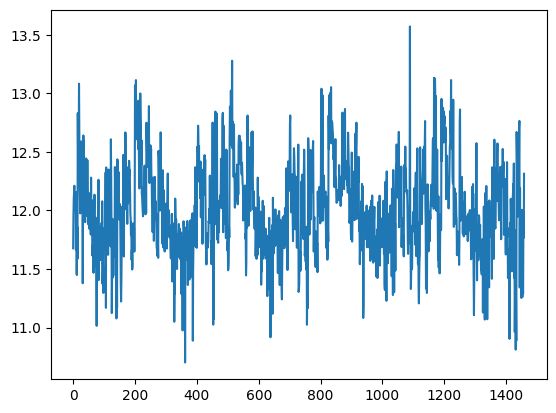

In [202]:
plt.plot(ridge_final_pred)

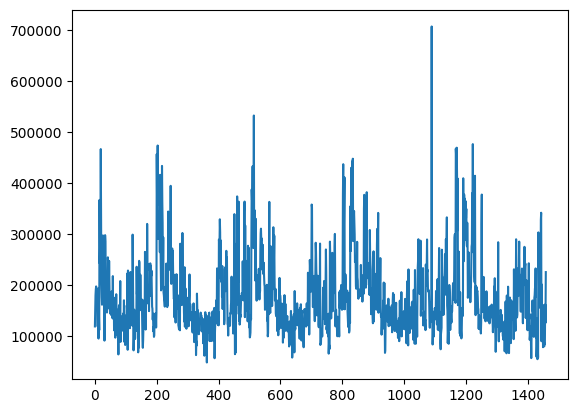

In [203]:
final_prediction = np.expm1(final_prediction)
plt.plot(final_prediction)

In [204]:
submission = pd.DataFrame({'Id' : raw_test.Id, 'SalePrice' : final_prediction})
submission.to_csv('submission2_perfect.csv',index=False)